# Stochastic Modelling of Motor Protein Transport

Motor proteins are biological molecules that convert chemical energy into mechanical energy, allowing them to move along structures in the cell, such as myofilaments.

In this notebook, we model motor protein transport as particles moving in a one-dimensional, two-level potential landscape.

### Goal
To understand how microscopic transition probabilities lead to macroscopic transport behavior.

### Approach
- Simulate motor protein movement using **random walk simulations**
- Represent the system as a **1D lattice with two potential levels**
- Assign stepping probabilities based on energy transitions
- Investigate the effect of model parameters on net transport
- Compare simulation results to theoretical predictions


In [1]:
# Importerer nødvendige biblioteker
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


plt.rcParams.update({
    "figure.figsize": (6, 4),  # Setter figurstørrelsen til 6x4 tommer
    "font.family": "serif",             
    "mathtext.fontset": "cm",
    "font.size": 12,                # Større font
    "axes.titlesize": 16,           # Tittelstørrelse
    "axes.labelsize": 12,           # Akselabel-størrelse
    "xtick.labelsize": 14,          # Størrelse på x-ticks
    "ytick.labelsize": 14,          # Størrelse på y-ticks
    "legend.fontsize": 10,          # Størrelse på legend
    "lines.linewidth": 2,           # Tykke linjer
    "axes.grid": True,              # Slår på grid
    "grid.linestyle": "--",         # Stiplet grid
    "grid.alpha": 0.6,              # Gjennomsiktig grid
    "axes.prop_cycle": plt.cycler("color", ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]),  # Fine farger
    "figure.dpi": 225,            # Høyere oppløsning på figurer
})

#### Modellering av motorproteiner med virrevandring i et skrallepotensial skrudd av og på 

## Oppgave 1a) 
 Vi skal vise at funksjonen $\phi(x,t)$ er en løsning av diffusjonslikningen 

$\frac{\partial \phi(x, t)}{\partial t} = D\frac{\partial^2}{\partial x^2} \phi(x, t)$, 

der  

$\phi(x,t) = \frac{1}{\sqrt{4\cdot\pi\cdot D \cdot t}}\int_{-\infty}^{\infty} h(y) \cdot \exp{-\frac{(x-y)^2}{4\cdot D \cdot t}}\, dy$.

Begynner med å beregne $\frac{\partial \phi(x,t)}{\partial t}$,

$\frac{\partial \phi(x,t)}{\partial t} = \frac{1}{\sqrt{4\cdot \pi \cdot  D \cdot t}}\int_{-\infty}^{\infty} h(y) e^{-\frac{(x-y)^2}{4\cdot D \cdot t}}\, dy \cdot (\frac{(x-y)^2}{4\cdot D \cdot t^2} - \frac{1}{2\cdot t})$.
 
Vi har videre at

$\frac{\partial \phi(x,t)}{\partial x} = \frac{1}{\sqrt{4\cdot \pi \cdot  D \cdot t}} \int_{-\infty}^{\infty} h(y) \cdot (-\frac{(x-y)}{2\cdot D \cdot t} \cdot e^{-\frac{(x-y)^2}{4 \cdot D \cdot t}}) \, dy$,

$\frac{\partial^2 \phi(x,t)}{\partial x^2} = \frac{1}{\sqrt{4\cdot \pi \cdot  D \cdot t}} \int_{-\infty}^{\infty} h(y) \cdot e^{-\frac{(x-y)^2}{4 \cdot D \cdot t}} \cdot (\frac{(x-y)^2}{4\cdot D^2 \cdot t^2} - \frac{1}{2 \cdot D \cdot t})\,dy $.

Her observerer vi at dersom vi multipliserer $\frac{\partial^2 \phi(x,t)}{\partial x^2}$ med D at $\phi(x,t)$ oppfyller diffusjonslikningen  

$\frac{\partial \phi(x, t)}{\partial t} = D\frac{\partial^2}{\partial x^2} \phi(x, t)$.

#### Tolkning av h(y):

Uttrykket $\frac{1}{\sqrt{4\cdot \pi \cdot  D \cdot t}} \cdot e^{-\frac{(x-y)^2}{4 \cdot D \cdot t}}$ er sannsynlighetsfunksjon til en normalfordeling med standardavvik $\sigma = \sqrt{2\cdot D \cdot t}$ og forvetningsverdi $\mu = y$.

$\lim_{t \to 0} \sigma = 0$. Dette fører til at normalfordelinga går mot en Dirac-deltafunksjon i $t = 0$.
På grunn av den negative eksponenten vil eksponensialfunksjonen gå mot null overalt, med unntak av der $x = y$, da $e^0 = 1$.

Normalfordeling tilnærmes en Dirac-deltafunksjon, da den oppfyller følgende egenskaper:
1. Integralet over funksjonen er lik 1. Dette er oppfylt, siden det er en sannsynlighetsfunksjon.
2. Funksjonen går mot null i alle punkt, unntatt i $x=y$.

Dermed kan vi skrive om grenseverdien:  

$\phi(x, \lim_{t \to 0}) = \int_{-\infty}^{\infty} h(y)\delta(x-y)\, dy$.

Da Dirac-deltafunksjonen har egenskapen

$\int_{-\infty}^{\infty} h(y)\delta(x-y)\, dy = h(x)$,

har vi at

$\phi(x,0) = h(x)$.

Dette betyr at $h(y)$ er inititalfordelingen av partikler langs x-aksen ved tidspunktet $t = 0$. Etterhvert som tiden øker, vil partiklene spre seg som et resultat av diffusjon. 

## Oppgave 1b

Sannsynligheten for å finne en partikkel i posisjon $x$ i et potensial $V(x)$ er gitt med

$P(x) = \frac{e^{-\beta V(x)}}{Z}$,

der $Z$ er partisjonfunksjon, dvs summen av alle mulige tilstander.

$V(x)$ er partikkelens potensielle energi i posisjon $x$, $\beta = \frac{1}{k_{B}T}$ hvor $k_{B}$ er Boltzmanns konstant og $T$ er temperaturen.

Sannsynligheten for å ta et steg til høyre, venstre eller å stå stille er henholdsvis:

$p^+ = P(x_0 +1 ) = \frac{e^{-\beta V(x_0 + 1)}}{Z} = \frac{e^{-\beta V(x_0+1)}}{e^{-\beta V(x_0+1)} + e^{-\beta V(x_0)} + e^{-\beta V(x_0-1)}}$,

$p^- = P(x_0 - 1) = \frac{e^{-\beta V(x_0 - 1)}}{Z} = \frac{e^{-\beta V(x_0-1)}}{e^{-\beta V(x_0+1)} + e^{-\beta V(x_0)} + e^{-\beta V(x_0-1)}}$.

$p^0 = P(x_0) = \frac{e^{-\beta V(x_0)}}{Z} = \frac{e^{-\beta V(x_0)}}{e^{-\beta V(x_0+1)} + e^{-\beta V(x_0)} + e^{-\beta V(x_0-1)}}$,




Ved å dele både teller og nevner i $p^+$, $p^-$ og $p^0$ med hhv. $e^{-\beta V(x_0+1)}$, $e^{-\beta V(x_0-1)}$ og $e^{-\beta V(x_0)}$ får man

$
p^+ = \frac{1}{1 + e^{-\beta [V(x_0-1) - V(x_0+1)]} + e^{-\beta [V(x_0) - V(x_0+1)]}}
$

$
p^- = \frac{1}{1 + e^{-\beta [V(x_0+1) - V(x_0-1)]} + e^{-\beta [V(x_0) - V(x_0-1)]}}
$

$
p^0 = \frac{1}{1 + e^{-\beta [V(x_0-1) - V(x_0)]} + e^{-\beta [V(x_0+1) - V(x_0)]}}
$







## Oppgave 1c)

Hva skjer med $p^+$, $p^0$ og $p^-$ når temperaturen $T$ tilfredsstiller følgende betingelser: 

#### Betingelse 1) Høy temperatur

Ved høy temperatur er den termiske energien stor relativ til potensialforskjellene, slik at potensialforskjellene har et neglesjerbart bidrag til translasjonssannsynlighetene. Dette gjør at partiklene beveger seg tilfeldig og ikke er begrenset av potensialforskjeller. Dette kan man se på sannsynlighetsuttrykkene.

$\beta = \frac{1}{k_B T} \ll |{V(x + 1) - V(x)}|$ gir

$\beta |V(x+1) - V(x)| \ll 1$, slik at

$\lim_{T \to \infty}e^{-\beta [V(x+1) - V(x)]} = \lim_{T \to \infty}e^{-\frac{1}{k_B T} [V(x+1) - V(x)]} = e^{0} = 1$ 

Satt inn i uttrykkene for sannsynlighet får man:

$p^+ \approx p^0 \approx p^- \approx \frac{1}{1 + e^0 + e^0} = \frac{1}{3}$.

Altså er sannsynligheten for at partikkelen beveger seg den ene eller andre veien den samme. Partikkelen beveger seg tilfeldig når termisk energi dominerer over potensialenergi.


#### Betingelse 2) Lav temperatur

$\beta = \frac{1}{k_B T} \gg |{V(x + 1) - V(x)}|$ 

Ved lave temperaturer bestemmes translasjonsannsynlighetene i større grad av potensialforskjeller.

- For $V(x-1) > V(x) > V(x+1)$, blir $p^+ \approx 1$, $p^0 \approx 0$, $p^- \approx 0$.

- For $V(x+1) > V(x) > V(x-1)$, blir $p^+ \approx 0$, $p^0 \approx 0$, $p^- \approx 1$.

- For $V(x-1) > V(x) < V(x+1)$, blir $p^+ \approx 0$, $p^0 \approx 1$, $p^- \approx 0$.

Ved lav temperatur vil partikkelen bevege seg mot lavere potensial, da den termiske energien er for liten til å "hoppe over" potensialbarrierer.

 






## Oppgave 2

### Funksjonsdefinisjoner for oppgave 2

In [68]:
# Alle funksjoner som brukes i oppgave 2 er definert her

def p_plus(x, beta_k, V):
    """
    Sannsynligheten for at en partikkel tar et skritt mot høyre
    """
    return 1/(1+np.exp(-beta_k*(V(x-1)-V(x+1)))+np.exp(-beta_k*(V(x)-V(x+1))))

def p_zero(x, beta_k, V):    
    """
    Sannsynligheten for at en partikkel blir stående i ro.
    """
    return 1/(1+np.exp(-beta_k*(V(x-1)-V(x)))+np.exp(-beta_k*(V(x+1)-V(x))))

def p_minus(x, beta_k, V):
    """
    Sannsynligheten for at en partikkel tar et skritt mot venstre.
    """
    return 1/(1+np.exp(-beta_k*(V(x+1)-V(x-1)))+np.exp(-beta_k*(V(x)-V(x-1))))

def fordeling(particles, steps, beta_k, V, reset):
    """
    Inputs:
    - particles: en liste med partikler
    - steps: antall steg vi ønsker å ta
    - T: temperaturen
    - V: potensialet
    - reset: en boolsk verdi som sier om vi skal starte med partiklene x = 0 eller ikke

    Outputs:
    - en liste med partikler etter at de har tatt stegene

    For hvert steg har hver av de 5000 partiklene 
    en sannsynlighet for å enten gå til høyre, stå i ro eller gå til venstre
    vi itererer gjennom hvert steg først og så for hver partikkel.
    Funksjonen itererer over hver partikkel og hvert steg.
    

    """

    new_particles = particles.copy() # Lager en kopi av partiklene for å ikke endre på den opprinnelige listen
    if reset == True:
        new_particles = np.zeros(n)
    for i in range(steps):
        for j in range(n):
            p = np.random.uniform(0,1) # Trekker et tilfeldig tall mellom 0 og 1
            if p <= p_minus(new_particles[j], beta_k, V): # Sjekker om partikkelen skal gå til venstre
                new_particles[j] -= 1 # Går til venstre
            elif p > 1-p_plus(new_particles[j], beta_k, V): # Sjekker om partikkelen skal gå til høyre
                new_particles[j] += 1 # Går til høyre
    return new_particles

def plot_histogram_with_potential(ax, data, title):
    """
    Input:
    - ax: en figur
    - data: en liste med partikkelposisjoner
    - title: tittelen på plottet

    Plotter et histogram av partikkelposisjonene.
    """
    ax.hist(data, bins=20, edgecolor="black", alpha=0.6, label = "Partikkelfordeling")

    # Generer x-verdier som dekker hele histogrammet
    x_min, x_max = ax.get_xlim()  # Hent grensene for x-aksen
    x = np.linspace(x_min, x_max, 1000)  # Opprett x-verdier over hele plottet

    ax.set_title(title)
    ax.set_xlabel("Posisjon")
    ax.set_ylabel("Antall partikler")
    ax.legend(loc = "upper right")

def plot_histogram_with_fit(ax, data, title):
    """
    Input:
    - ax: en figur
    - data: en liste med partikkelposisjoner
    - title: tittelen på plottet

    Plotter et normalfordelt histogram av partikkelposisjonene. 
    """
    ax.hist(data, bins=20, edgecolor="black", density=True, alpha=0.6, label = "Sannsynlighetsfordeling")

    # Generer x-verdier som dekker hele histogrammet
    x_min, x_max = ax.get_xlim()  # Hent grensene for x-aksen
    x = np.linspace(x_min, x_max, 1000)  # Opprett x-verdier over hele plottet

    mu, std = norm.fit(data)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2, label=fr'Normal fit: $\mu={mu:.2f}$, $\sigma={std:.2f}$')
    ax.set_title(title)
    ax.set_xlabel("Posisjon")
    ax.set_ylabel("Sannsynlighetstetthet")
    ax.legend(loc = "upper right")

In [69]:
# Definerer konstanter
h = 1 #stepsize
dt = 1 #tidssteg
n = 10000 #antall partikler vi starter med
k = 1
particles_initpos = np.zeros(n) # startposisjon for partiklene

beta_k_1 = 0.01
beta_k_2 = 1
beta_k_3 = 100

$\beta k$ kan tolkes som forholdet mellom potensialets energi og den termiske energien til partiklene:

$\beta k= \frac{k}{k_b T}$.

Lav $\beta k$ betyr høy termisk energi i forhold til potensialets barriere, mens en høy $\beta k$ betyr lav termisk energi og dermed større innflytelse fra potensialet, som diskutert i oppgave 1c).

## Oppgave 2a)

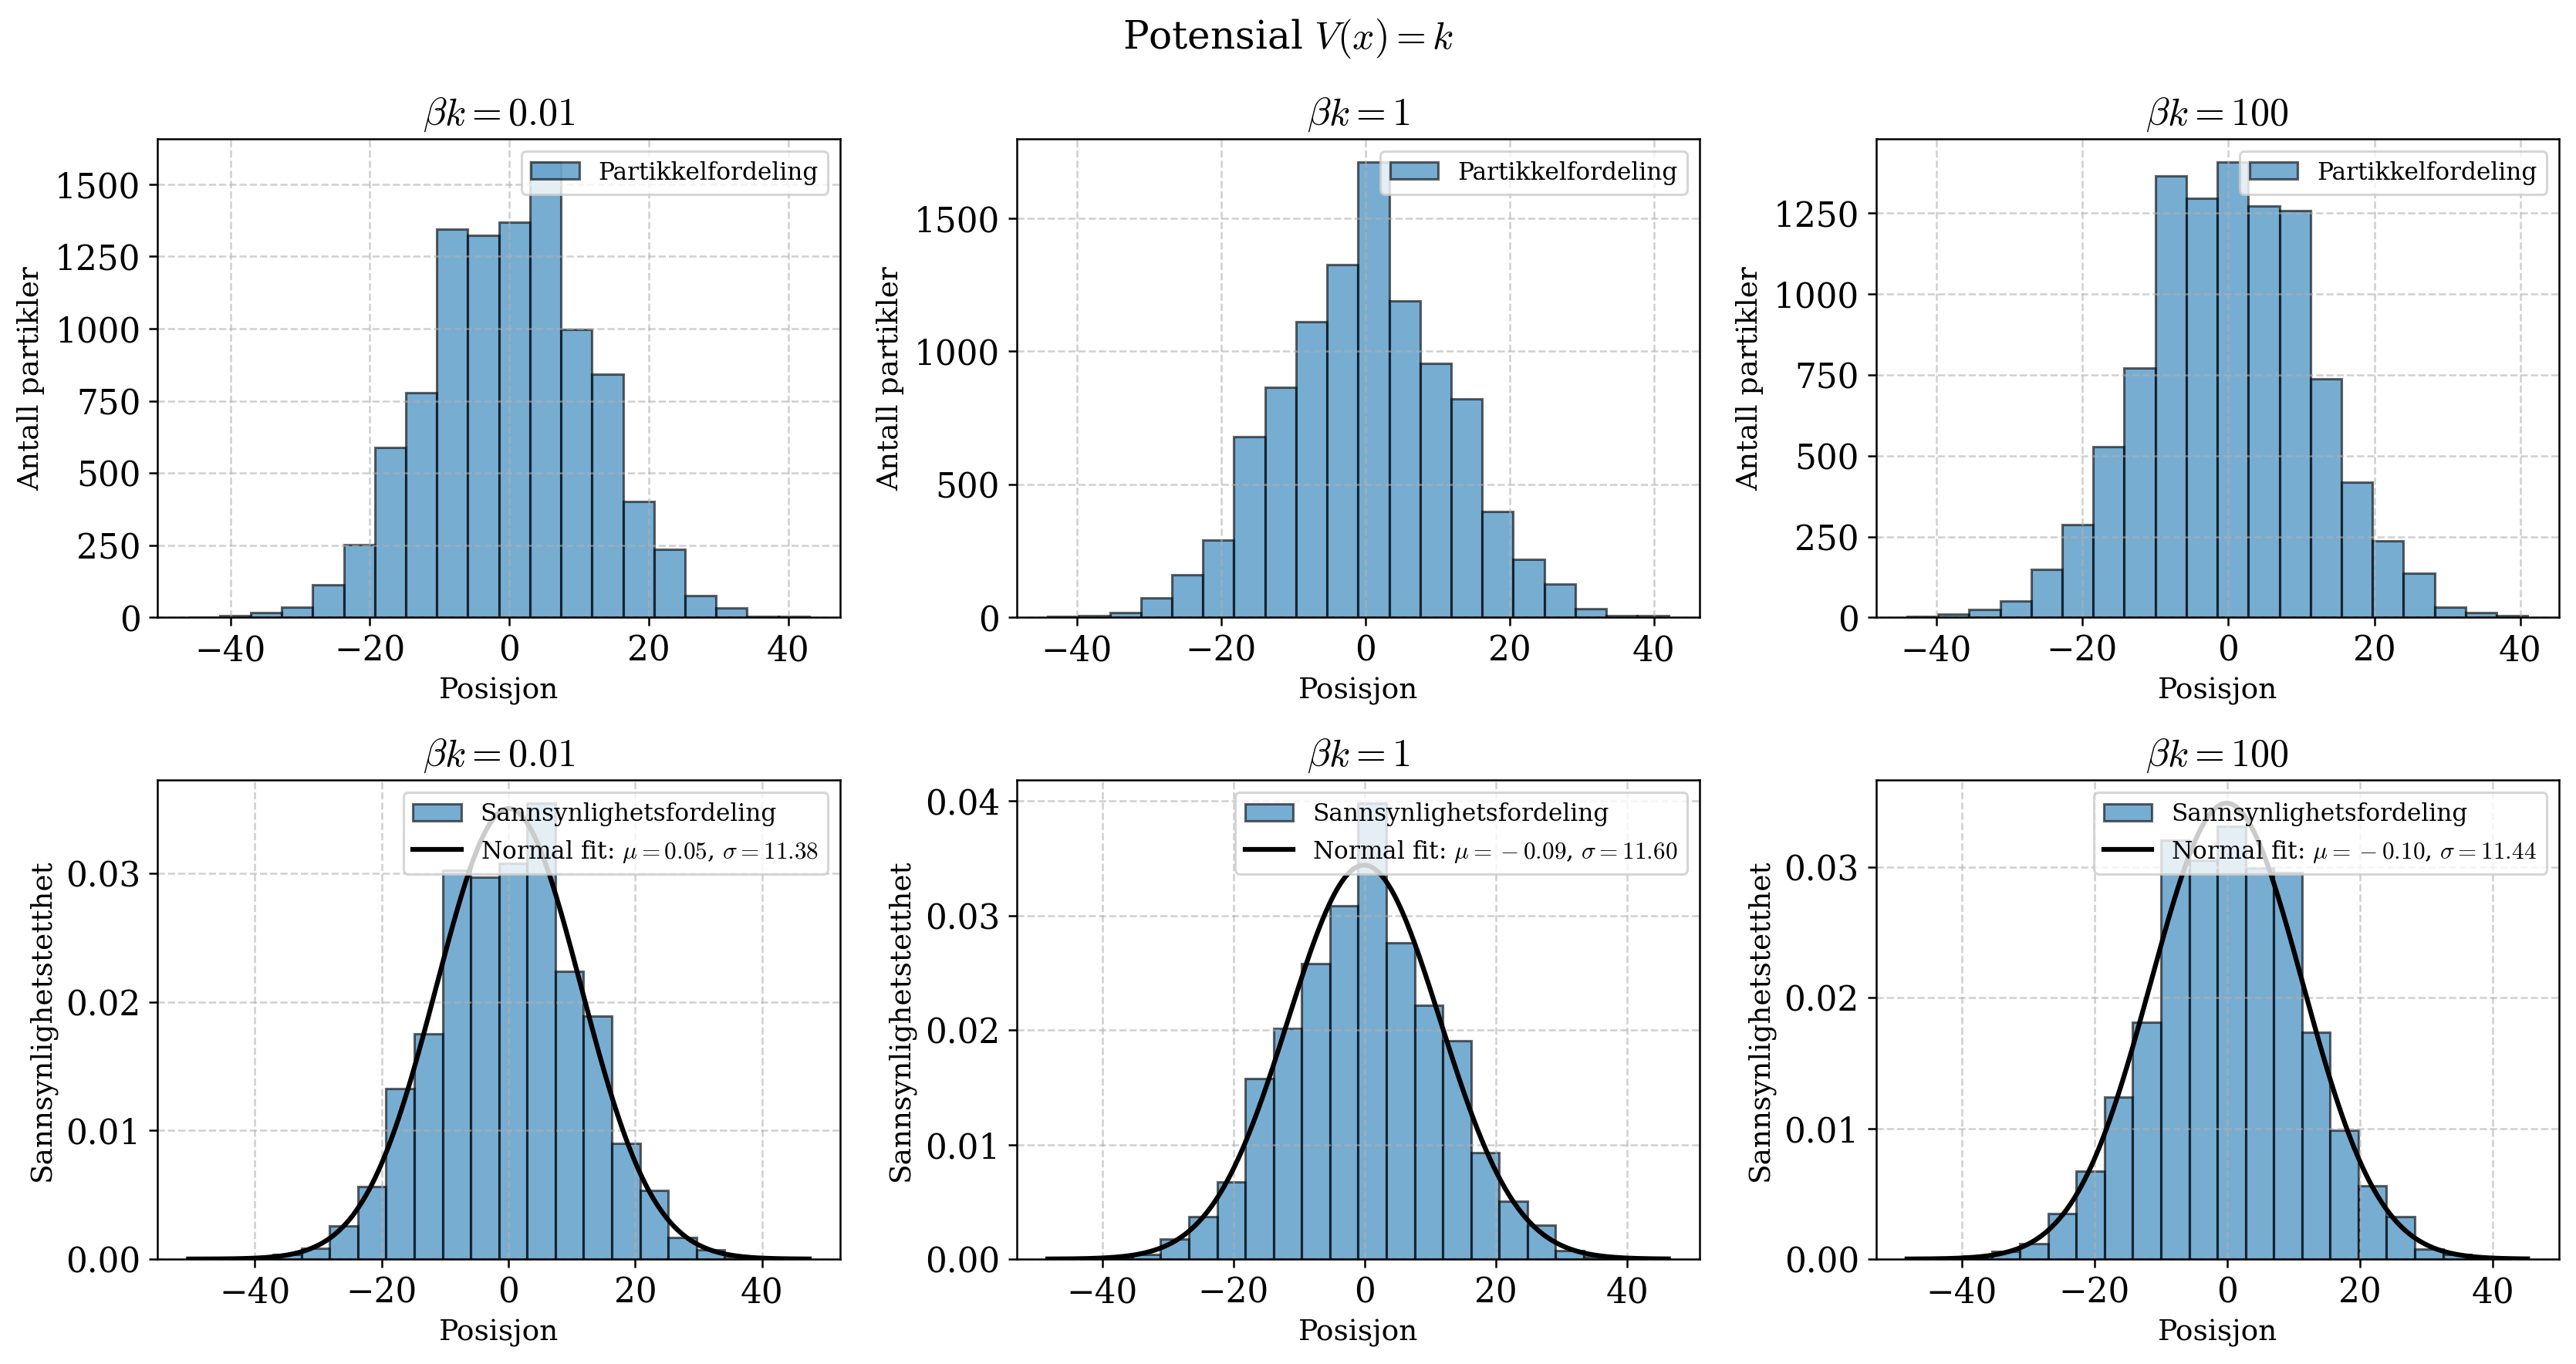

In [70]:
# Definisjon av potensialfunksjon
def V_1a(x): 
    return k

# Figur med 3 subplots
plt.figure(figsize=(15, 8))

fordeling_t1 = fordeling(particles_initpos, 200,beta_k_1, V_1a, True)
fordeling_t2 = fordeling(particles_initpos, 200,beta_k_2, V_1a, True)
fordeling_t3 = fordeling(particles_initpos, 200,beta_k_3, V_1a, True)

plt.subplot(231)
plot_histogram_with_potential(plt.gca(), fordeling_t1, r"$\beta k = 0.01$")
plt.subplot(232)
plot_histogram_with_potential(plt.gca(), fordeling_t2, r"$\beta k = 1$")
plt.subplot(233)
plot_histogram_with_potential(plt.gca(), fordeling_t3, r"$\beta k = 100$")
plt.subplot(234)
plot_histogram_with_fit(plt.gca(), fordeling_t1, r"$\beta k = 0.01$")
plt.subplot(235)
plot_histogram_with_fit(plt.gca(), fordeling_t2, r"$\beta k = 1$")
plt.subplot(236)
plot_histogram_with_fit(plt.gca(), fordeling_t3, r"$\beta k = 100$")

plt.suptitle(r"Potensial $V(x) = k$", fontsize=16)
plt.tight_layout()
plt.show()

##### Forklaring 2a)

For et konstant potensial styres partiklenes bevegelser kun av termisk diffusjon, da det ikke er noen potensialforskjeller som påvirker dem. Det vil si at sannsynligheten for at en partikkel beveger seg mot høyre, venstre eller står i ro er uavhengig av dens posisjon $x$. Den følger en tilfeldig vandring med like translasjonssannsyligheter.

$V(x_0+1) = V(x_0) = V(x_0-1)$ s.a $p^+ = p^0 = p^- = 1/3$

Ved mange iterasjoner av en slik simulering vil partikkelfordelingen konvergere mot en normalfordeling, i samsvar med sentralgrenseteoremet og hva vi ser i plottet. 

## Oppgave 2b)

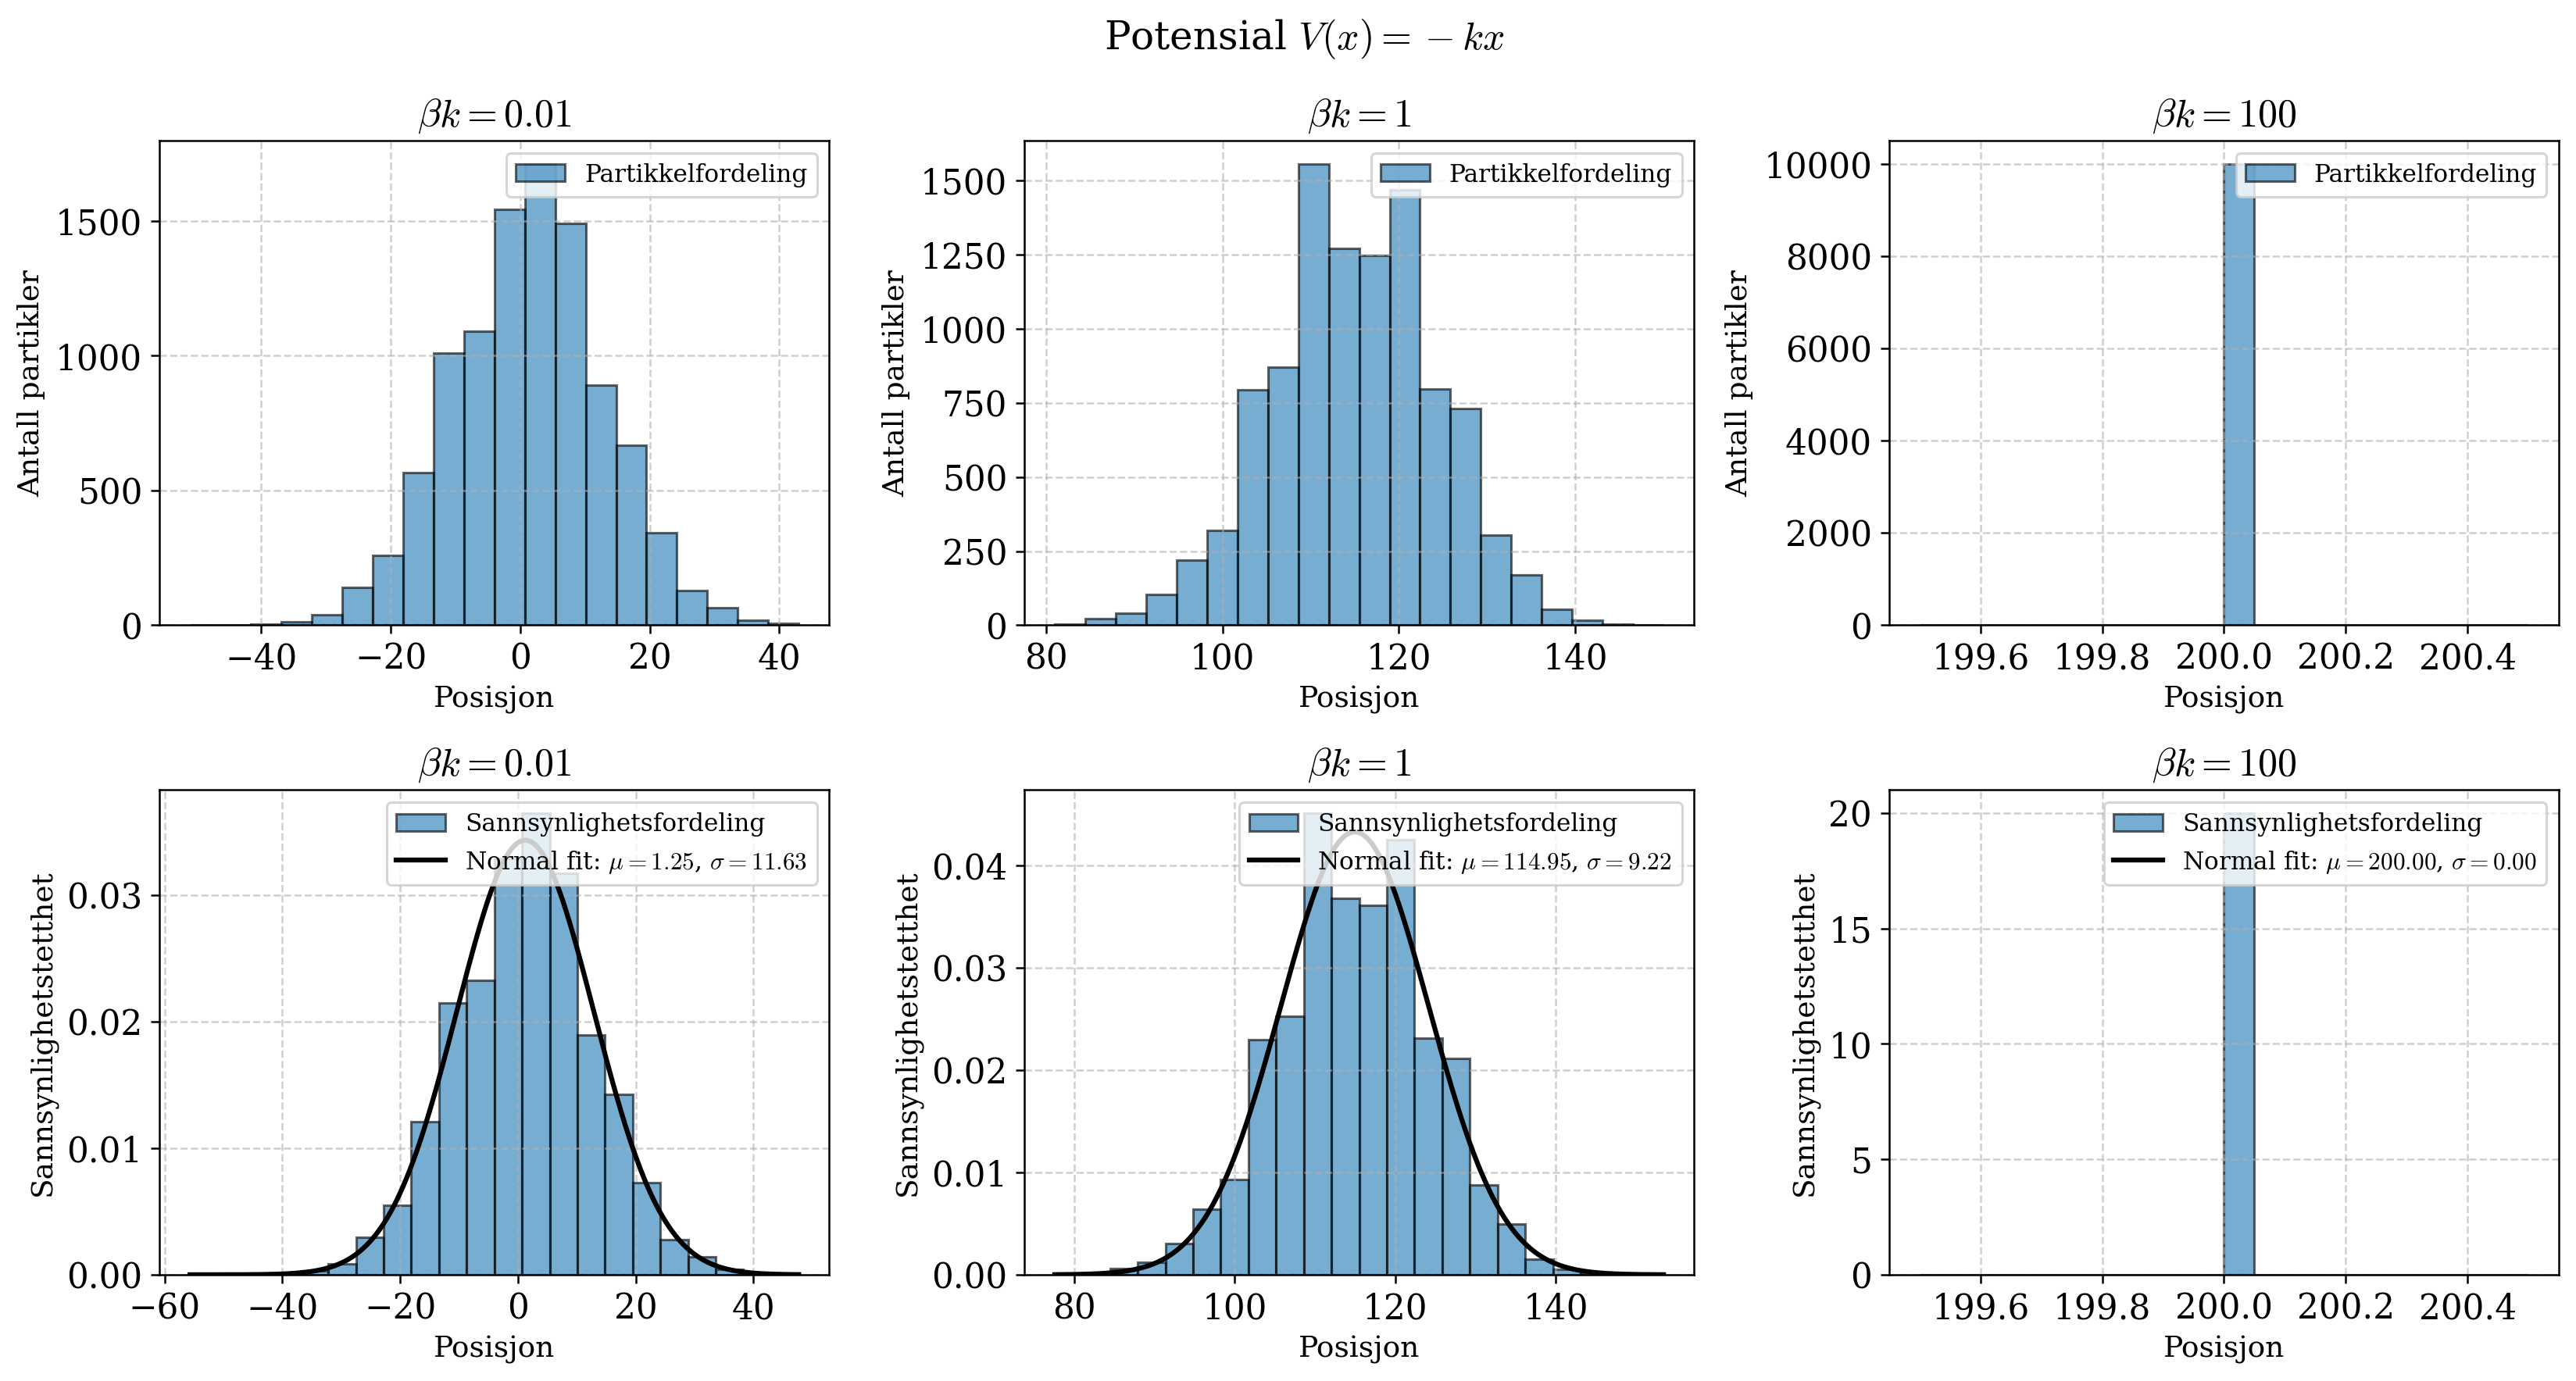

In [71]:
def V_b(x):
    return -k*x

# Figur med 3 subplots
plt.figure(figsize=(15, 8))

fordeling_t1 = fordeling(particles_initpos, 200, beta_k_1, V_b, True)
fordeling_t2 = fordeling(particles_initpos, 200, beta_k_2, V_b, True)
fordeling_t3 = fordeling(particles_initpos, 200, beta_k_3, V_b, True)

plt.subplot(231)
plot_histogram_with_potential(plt.gca(), fordeling_t1, r"$\beta k = 0.01$")
plt.subplot(232)
plot_histogram_with_potential(plt.gca(), fordeling_t2, r"$\beta k = 1$")
plt.subplot(233)
plot_histogram_with_potential(plt.gca(), fordeling_t3, r"$\beta k = 100$")
plt.subplot(234)
plot_histogram_with_fit(plt.gca(), fordeling_t1, r"$\beta k = 0.01$")
plt.subplot(235)
plot_histogram_with_fit(plt.gca(), fordeling_t2, r"$\beta k = 1$")
plt.subplot(236)
plot_histogram_with_fit(plt.gca(), fordeling_t3, r"$\beta k = 100$")

plt.suptitle(r"Potensial $V(x) = -k x$", fontsize=16)
plt.tight_layout()
plt.show()


#### Forklaring 2b)
Potensialet er lineært avtagende mot høyere verdier av $x$, noe som betyr at partiklene hele tiden "trekkes" mot høyere verdier av $x$-verdier. Dette gir netto partikkelstrøm i positiv retning. Effekten av "trekkraften" avhenger av verdien av $\beta k$, som beskriver forholdet mellom potensialets påvirkning og den termiske energien.

- $\beta k = 0.01$: Partiklene har nok energi til å bevege seg fritt, og potensialets innvirkning er liten. Resultatet ligner på oppgave 2a), der partiklene diffunderer nesten som i et konstant potensial. Fordelingen er tilnærmet normalfordelt, men med en svak forskyvning mot høyere $x$, grunnet den svake påvirkningen fra potensialet.
- $\beta k = 1$: Potensialets effekt er sterkere og mer merkbar. Sannsynligheten for en partikkel å bevege seg mot venstre er lavere enn sannsynligheten for å bevege seg mot høyre. Resultatet er fremdeles en tilnærmet normalfordeling, men enda mer forskjøvet mot høyre enn for $\beta k = 0.01$.
- $\beta k = 100$: Den termiske energien er nå så lav, sammelignet med potensialets energi, at sannsynligheten for en partikkel å bevege seg mot venstre er tilnærmet $0$, mens sannsynligheten for å bevege seg mot høyre er tilnærmet $1$. Alle partiklene går mot høyre for alle tidssteg, og samlet seg i endepunktet.

## Oppgave 2c)

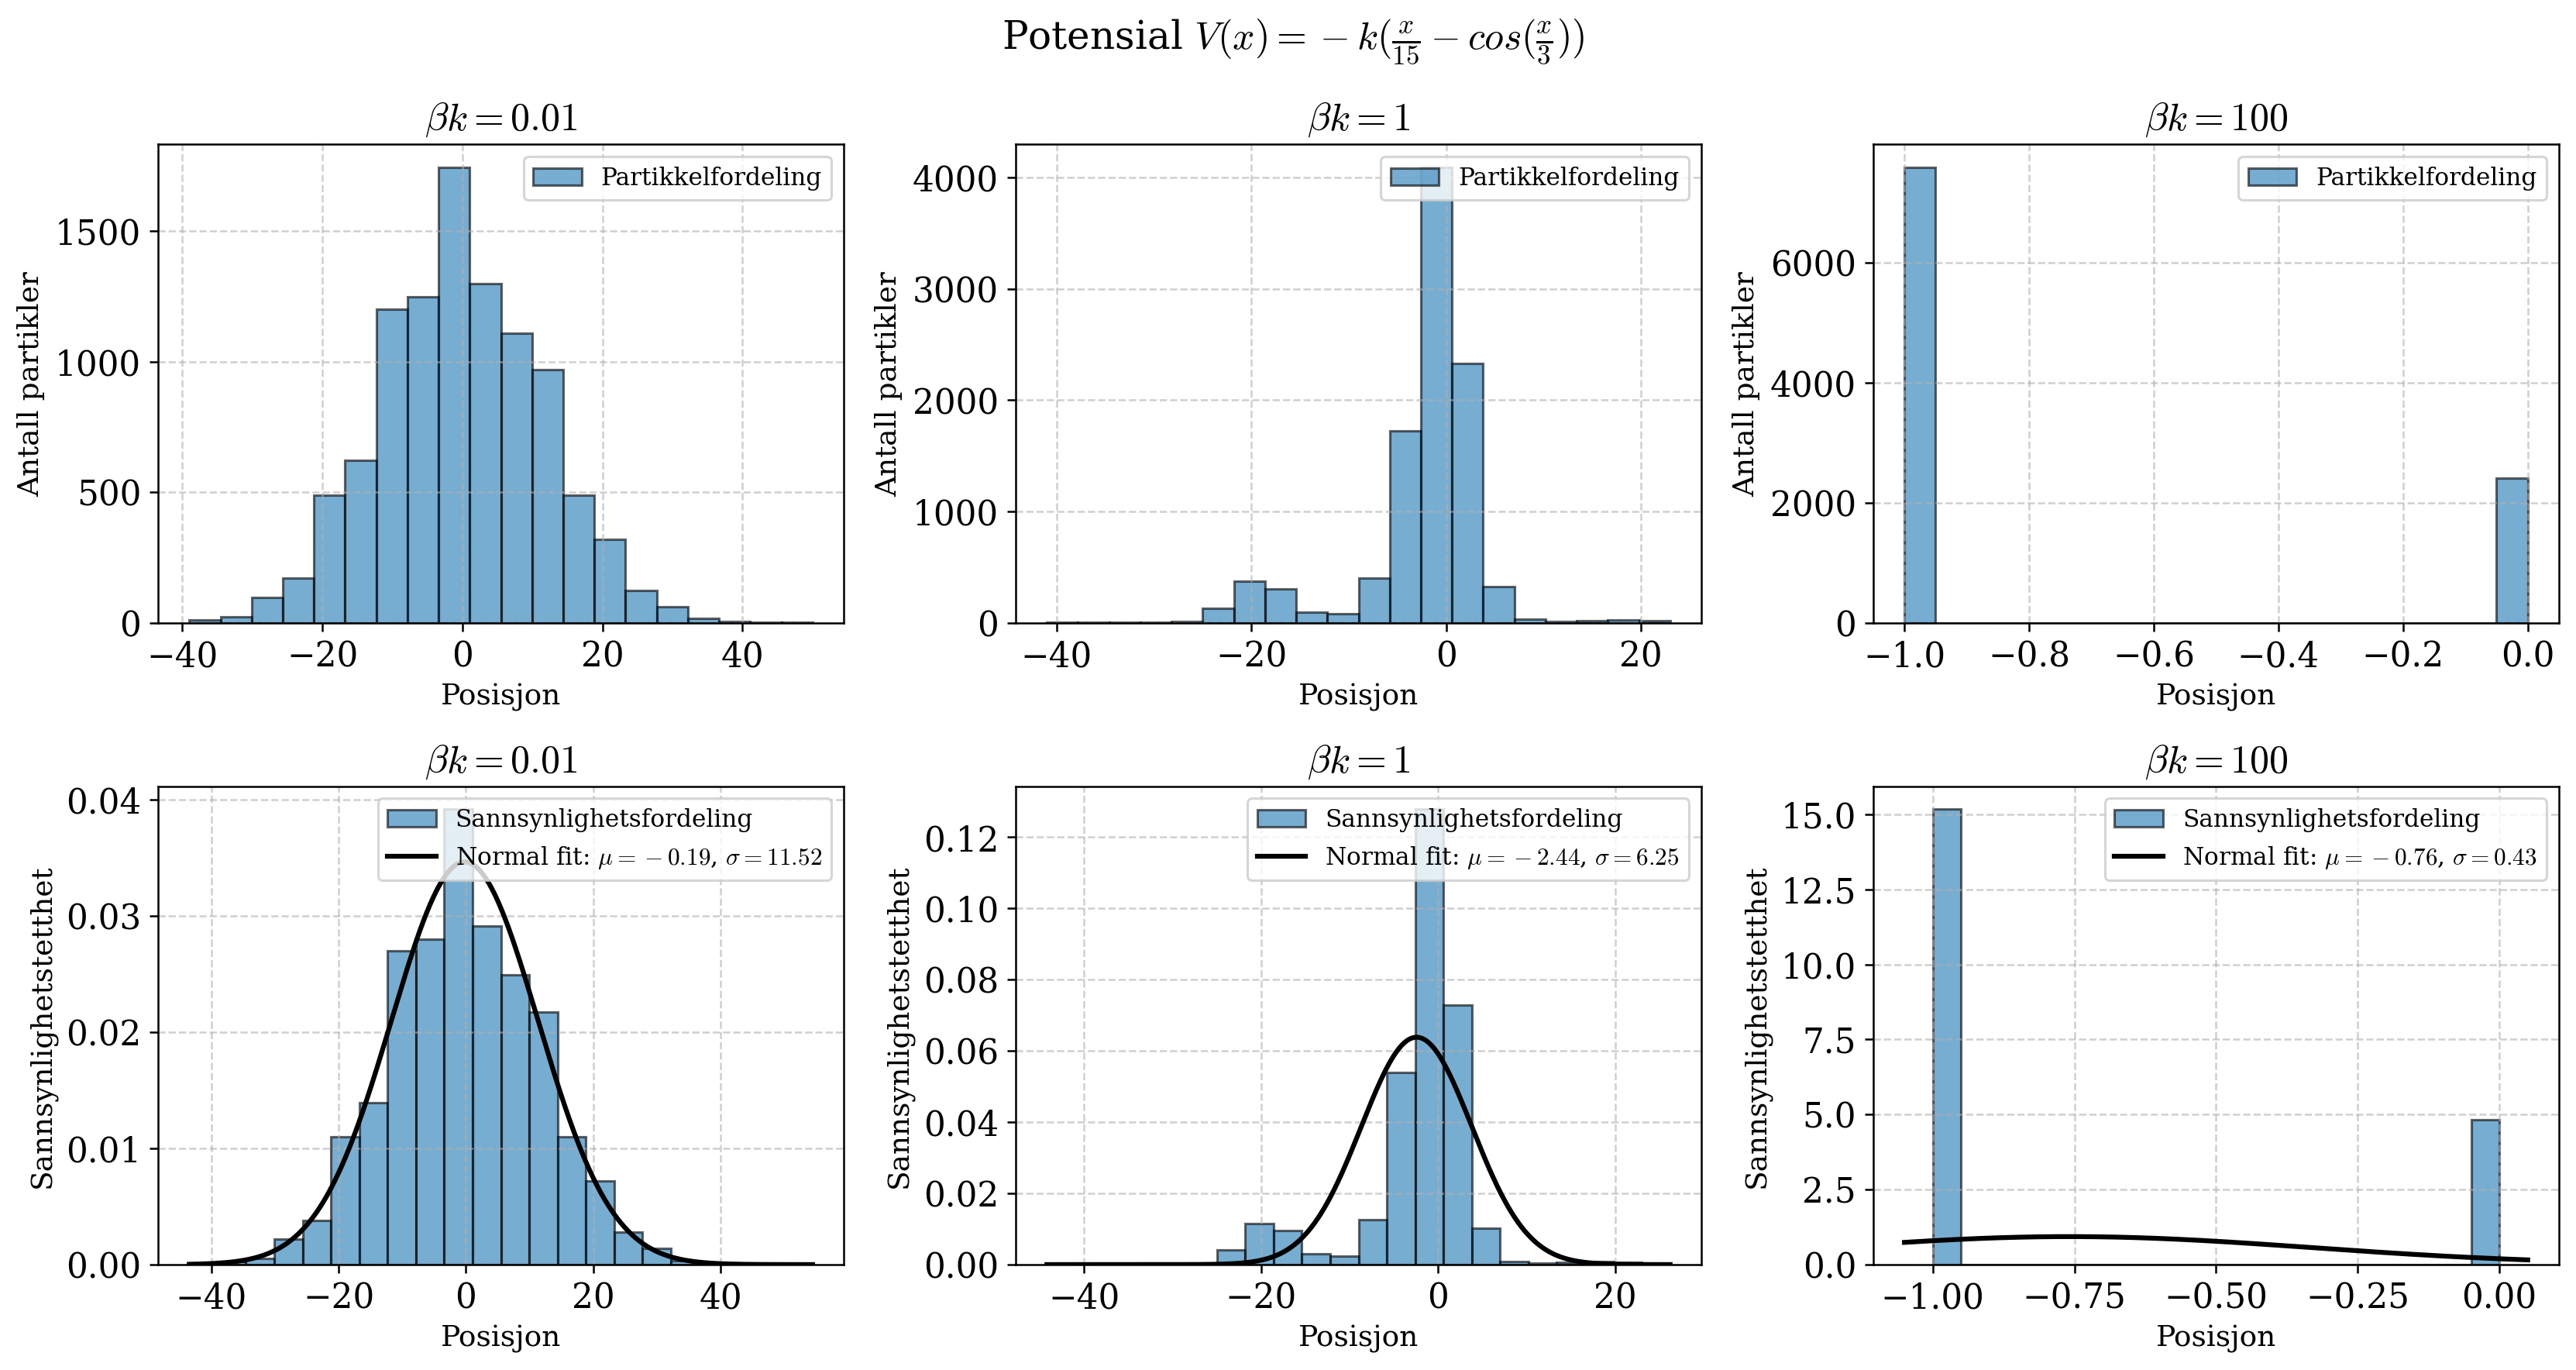

In [72]:
def V_c(x):
    return k*(x/15-np.cos(x/3))

fordeling_t1 = fordeling(particles_initpos, 200, beta_k_1, V_c, True)
fordeling_t2 = fordeling(particles_initpos, 200, beta_k_2, V_c, True)
fordeling_t3 = fordeling(particles_initpos, 200, beta_k_3, V_c, True)

# Figur med 3 subplots
plt.figure(figsize=(15, 8))

plt.subplot(231)
plot_histogram_with_potential(plt.gca(), fordeling_t1, r"$\beta k = 0.01$")
plt.subplot(232)
plot_histogram_with_potential(plt.gca(), fordeling_t2, r"$\beta k = 1$")
plt.subplot(233)
plot_histogram_with_potential(plt.gca(), fordeling_t3, r"$\beta k = 100$")
plt.subplot(234)
plot_histogram_with_fit(plt.gca(), fordeling_t1, r"$\beta k = 0.01$")
plt.subplot(235)
plot_histogram_with_fit(plt.gca(), fordeling_t2, r"$\beta k = 1$")
plt.subplot(236)
plot_histogram_with_fit(plt.gca(), fordeling_t3, r"$\beta k = 100$")

plt.suptitle(r"Potensial $V(x) = -k (\frac{x}{15} - cos(\frac{x}{3}))$", fontsize=16)
plt.tight_layout()
plt.show()


#### Forklaring 2c)

Potensialet har både en lineær komponent $\frac{x}{15}$ og en periodisk komponent $cos(\frac{x}{3})$. Den lineære komponenten fører til en svak drivkraft mot høyere $x$. Den periodiske komponenten skaper lokale potensialbrønner som partiklene kan bli "fanget" i, avhengig av $\beta k$.

- $\beta k = 0.01$: Høy temperatur lar partiklene hoppe fritt over potensialbarrierene, og fordelingen er tilnærmet normalfordelt.
- $\beta k = 1$: Potensialets innvirkning blir merkbar, men partiklene kan fortsatt bevege seg mellom brønnene. Partiklene har nok termisk energi til å hoppe ut av brønnen på venstre side, ettersom barrieren er lavere her enn for høyre side.
- $\beta k = 100$: Partiklene samles i potensialets minimumspunkter, ettersom de ikke har nok energi til å bevege seg ut av disse brønnene. Det nærmeste minimumet fra $x=0$ er i $x=-0.6$. Siden posisjoner er diskretisert til heltallsverdier, observerer vi størst konsentrasjon av partikler i $x=-1$, men også en del i $x=0$.

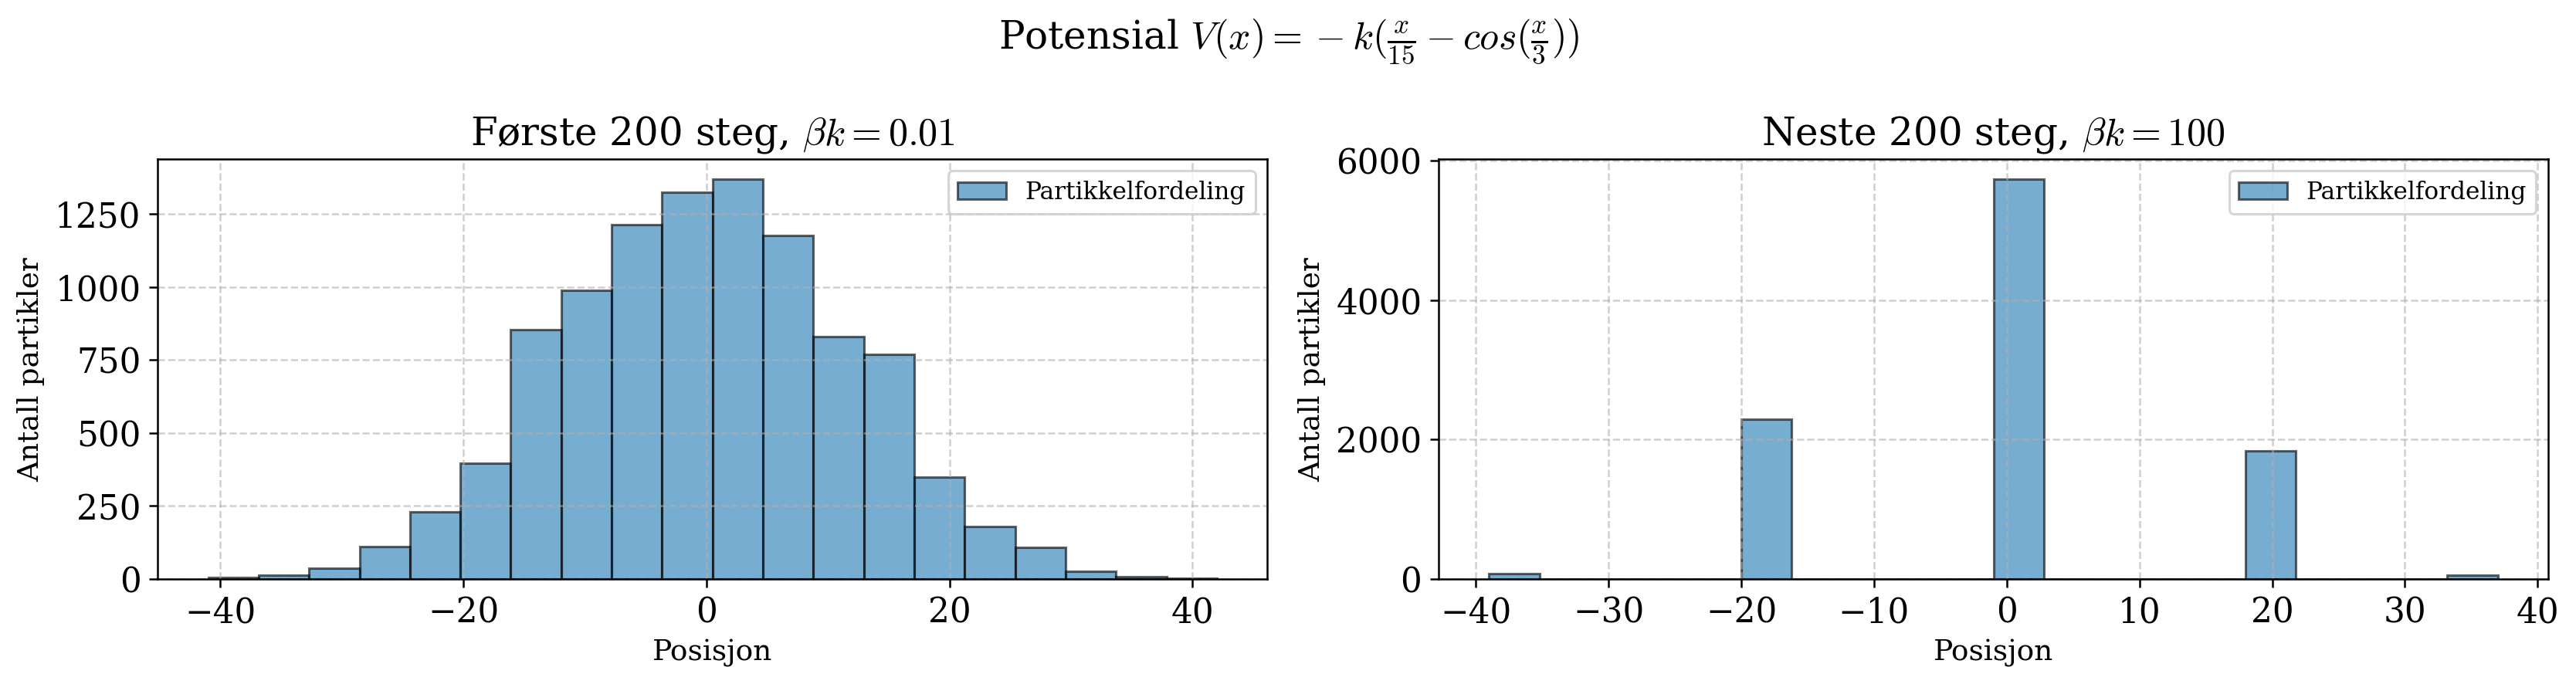

In [73]:
# 200 steg med beta*k = 0.01, deretter 200 steg med beta*k = 100
plt.figure(figsize = (15, 4))

fordeling_t1_første200 = fordeling(particles_initpos, 200, beta_k_1, V_c, True)
fordeling_t3_neste200 = fordeling(fordeling_t1_første200, 200, beta_k_3, V_c, False)

plt.subplot(121)
plot_histogram_with_potential(plt.gca(), fordeling_t1_første200, r"Første 200 steg, $\beta k = 0.01$")
plt.subplot(122)
plot_histogram_with_potential(plt.gca(), fordeling_t3_neste200, r"Neste 200 steg, $\beta k = 100$")

plt.suptitle(r"Potensial $V(x) = -k (\frac{x}{15} - cos(\frac{x}{3}))$", fontsize=16)
plt.tight_layout()

plt.show()

Simulerer først for $\beta k = 0.01$ i $200$ steg og deretter for $\beta k = 100$ i $200$ ytterlige steg.

- Lav $\beta k$ - høy temperatur: Når $\beta k = 0.01$, er den termiske energien mye høyere enn energibarrierene i potensialet. Det vil si at partiklene har stor frihet til å bevege seg og diffunderer nesten som om potensialet ikke eksisterer. Fordelingen blir nær normalfordelt rundt $x = 0$.

- Høy $\beta k$ - lav temperatur: Når $\beta k = 100$, dominerer potensialet. Den termiske energien er så lav at partiklene ikke lenger kan ignorere potensialets barrierer, men "setter seg fast" i områder med lav potensialenergi. Partiklene samles i potensialets lokale minima, rundt deres initialposisjon. Vi ser at lokale minima kommer med en periode på ca 20. Flest partikler initialiseres ved x = 0, da de følger en normalfordeling. 


## Oppgave 2d)

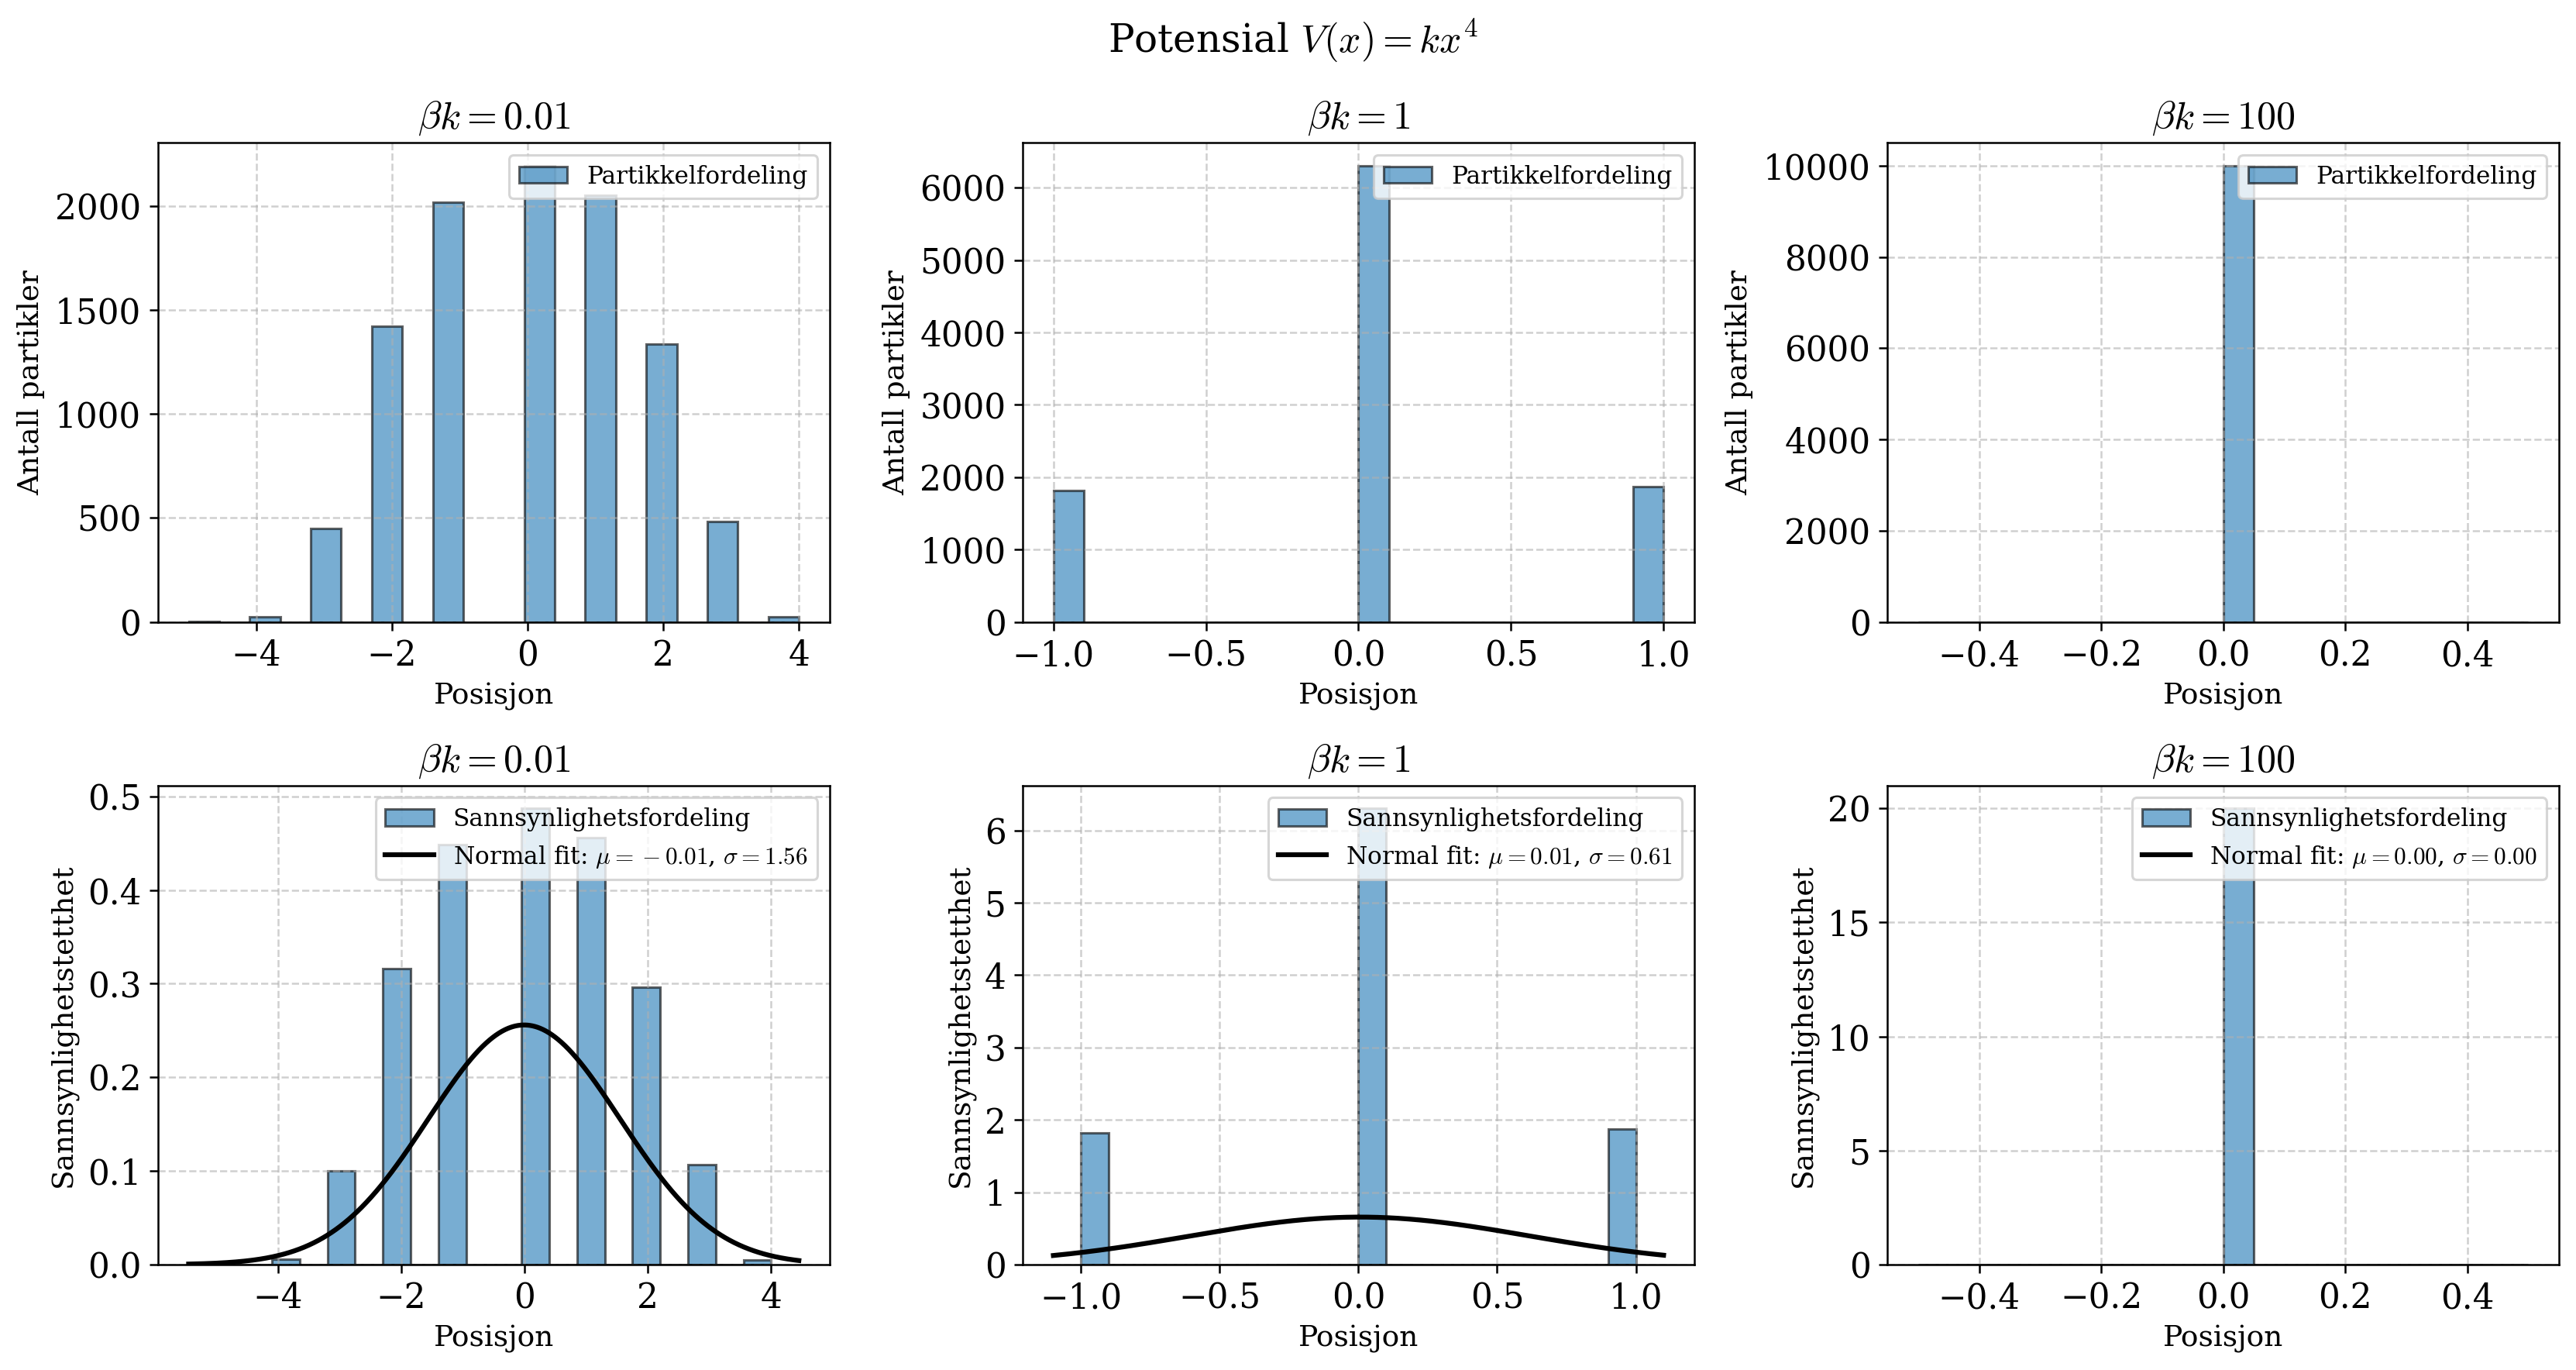

In [74]:
def V_d(x):
    return k * (x ** 4)

fordeling_t1 = fordeling(particles_initpos, 200,beta_k_1 , V_d, True)
fordeling_t2 = fordeling(particles_initpos, 200,beta_k_2, V_d, True)
fordeling_t3 = fordeling(particles_initpos, 200,beta_k_3, V_d, True)

# Figur med 3 subplots
plt.figure(figsize=(15, 8))

plt.subplot(231)
plot_histogram_with_potential(plt.gca(), fordeling_t1, r"$\beta k = 0.01$")

plt.subplot(232)
plot_histogram_with_potential(plt.gca(), fordeling_t2, r"$\beta k = 1$")

plt.subplot(233)
plot_histogram_with_potential(plt.gca(), fordeling_t3, r"$\beta k = 100$")

plt.subplot(234)
plot_histogram_with_fit(plt.gca(), fordeling_t1, r"$\beta k = 0.01$")

plt.subplot(235)
plot_histogram_with_fit(plt.gca(), fordeling_t2, r"$\beta k = 1$")

plt.subplot(236)
plot_histogram_with_fit(plt.gca(), fordeling_t3, r"$\beta k = 100$")

plt.suptitle(r"Potensial $V(x) = k x^{4}$", fontsize=16)
plt.tight_layout()
plt.show()

Potensialet er en symmetrisk "brønn", hvor potensialet øker raskt for store verdier av $x$. $x = 0$ er et globalt minimum. 
- $\beta k = 0.01$: Høy temperatur betyr at partiklene i mindre grad påvirkes av potensialforskjeller. Her har vi et sterkt økende potensial, som likevel vil begrense partiklenes spredning fra startpunkt, da startpunktet er et globalt minimum. 
- $\beta k = 1$: Potensialet begrenser i enda større grad hvor langt partiklene kan bevege seg fra startpunkt.
- $\beta k = 100$: Partiklene har for lite termisk energi til å bevege seg unna startpunkt. 

Potensialet øker med en faktor 4 vekk fra startposisjon. Dette krever ekstemt høye temperaturer når partikkelen beveger seg lengre fra startpunkt. Vi kan ikke bruke $\beta k$ alene til å si noe om hvilke krefter som dominerer. Ved korte distanser fra startpunkt, vil potensialet dominere uansett $\beta k$.

In [75]:
plt.rcParams.update({
    "font.family": "serif",             
    "mathtext.fontset": "cm",
    "font.size": 12,                
    "axes.titlesize": 16,           
    "axes.labelsize": 14,           
    "xtick.labelsize": 10,          
    "ytick.labelsize": 10,          
    "legend.fontsize": 10,          
    "lines.linewidth": 2,           
    "axes.grid": True,              
    "grid.linestyle": "--",         
    "grid.alpha": 0.6,              
    "axes.prop_cycle": plt.cycler("color", ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]),  
    "figure.dpi": 125,              
    "figure.figsize": (6, 4)  # **Reduserer figurstørrelsen**
})

### Funksjonsdefinisjoner for oppgave 3


In [76]:
#alle funksjoner som brukes til plot lengre nede i koden er definert her

''' 
Definerer funksjoner for periodisk potensial v(x) og konstant potensial v_c(x)
og tilsvarende potensialavhengige sannsynligheter. Funksjonen probabilities gjør om sannsynnlighetene 
til potensialene til lister, dette gjør at vi slipper å regne dem ut hver gang vi kjører simuleringene,
vi trenger kun å hente verdiene fra listen
'''

def v(x):
    x = ((x - x_l) % N) + x_l
    if x > 0:
        return (k*x)/(alpha*N)
    elif x <= 0:
        return -(k*x)/((1-alpha)*N)   
   
def v_c(x):
    return k

def p_plus(v,x):
    return 1/(1+np.exp(-beta_k*(v(x-1)-v(x+1)))+np.exp(-beta_k*(v(x)-v(x+1))))

def p_zero(v,x):
    return 1/(1+np.exp(-beta_k*(v(x-1)-v(x)))+np.exp(-beta_k*(v(x+1)-v(x))))

def p_minus(v,x):
    return 1/(1+np.exp(-beta_k*(v(x+1)-v(x-1)))+np.exp(-beta_k*(v(x)-v(x-1))))

def probabilities(v):

    xp = np.arange(x_l+1,x_r+1,1)
    
    probabilityList = np.zeros((3,len(xp)))
    probabilityList_c = np.zeros((3,len(xp)))
    for i in range(len(xp)):
        probabilityList[0][i] = p_plus(v,xp[i])
        probabilityList[1][i] = p_zero(v,xp[i])
        probabilityList[2][i] = p_minus(v,xp[i])
        probabilityList_c[0][i] = p_plus(v_c,xp[i])
        probabilityList_c[1][i] = p_zero(v_c,xp[i])
        probabilityList_c[2][i] = p_minus(v_c,xp[i])

    return probabilityList, probabilityList_c

""" 
funksjonen step tar inn et potensial, hvor mange timesteps, antall partikler og listen 'particles',
hvis et tilfeldig tall p er større enn 1 - sannsynligheten for et steg til høyre tar partiklene ett steg til høyre.
hvis dette tallet er mindre enn sannsynligheten for å ta et steg til venstre tar den et steg til venstre
ellers står partiklen i ro

kommandoen for posX gjør at vi kun trenger å benytte en funksjon, hvis partiklen befinner seg utenfor 
den første perioden dyttes den inn i dette (kun for beregninger)
dette skjer ved å 
1. Dytter punktet inn i den første perioden
f.eks hvis perioden går fra [-10,10] og vi har verdien -11 så vil dette 
punktet flyttes til -1, da er det inne der funksjonen er definert

2. tar modulus av dette punktet og bredden på intervallet
Dette gjør at vi finner ut hvor langt unna posisjonen til partiklen er fra nullpunktet

3. tilslutt justerer vi tilbake posisjonen 

siden vi har lister med sannsynligheter, kan vi ikke bruke posisjoner som input men indekser,
vi transformerer derfor posisjonene til indekser til sannsynlighetslistene våre før vi kjører løkka.
Dette gjør at vi finner sannsynligheten til posisjonen gjennom indeksen.

"""

def step(v,timestep,partikler,particles,current,time):

    for j in range(timestep):

        pos_curr = 0
        neg_curr = 0
        null = 0


        for i in range(partikler):
            #tilfeldig tall
            p = np.random.uniform(0,1)
            posX= ((particles[i] - x_l) % N) + x_l
            posX = int(posX + ((1 - alpha) * N))
            posX = min(N-1, max(0, posX))  


            if v == v_c:
                if p > (1-probabilityList_c[0][posX]):
                    particles[i] += 1
                    pos_curr += 1

                elif p <= probabilityList_c[2][posX]:
                    particles[i] -= 1
                    neg_curr += 1

                else:
                    null += 1

            elif v == v:

                if p > (1-probabilityList[0][posX]):
                    particles[i] += 1
                    pos_curr += 1

                elif p <= probabilityList[2][posX]:
                    particles[i] -= 1
                    neg_curr += 1

                else:
                    null += 1

        current[time] = (pos_curr - neg_curr)/partikler
        time += 1
    
    return particles,current,time

''' 
Funksjonen randomwalk tar inn parametre: antall sykluser, timesteps per syklus, antall partikler, og lista particles (posisjoner)
randomwalk bruker funksjonen step og beregner posisjoner etter hver syklus,
det vil si syklus med eksitasjon og deeksitasjon
Funksjonen j_avg returnerer den gjennomsnittlige strømningen av bevegelsen av partikler per syklus
'''


def RandomWalk(cycles, timestep, antallPartikler,particles):
    abs_positions = []
    time = 0
    current = np.zeros(2*cycles*timestep)

    for i in range(cycles):

        particles,current,time = step(v_c,timestep,antallPartikler,particles,current,time)
        particles,current,time = step(v,timestep,antallPartikler,particles,current,time)

        abs_positions.append(particles.copy())

    return abs_positions, current

def j_avr(cycles,current,timeSteps):
    j = np.zeros(cycles)
    for i in range(cycles):
        j[i] = (1/(2*timeSteps)) * np.sum(current[1+2*timeSteps*i:2*timeSteps*(i+1)])
    return j

### Oppgave 3a)

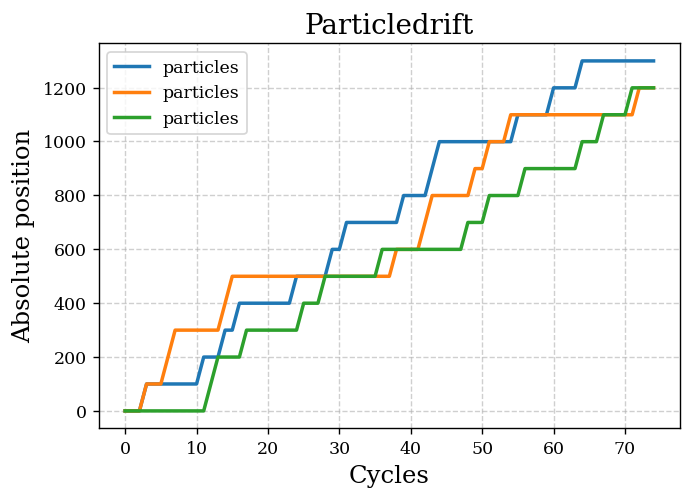

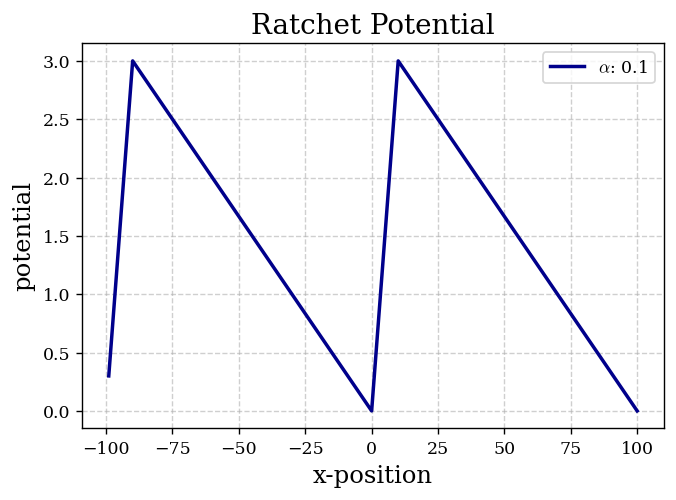

In [77]:
#parametre

alpha = 0.1
N = 100
k = 3
x_l = (-(1-alpha)*N)
x_r = (alpha*N)
x = np.arange(-N+1,N+1,1)
beta_k = 1000
cycles = 75
timesteps = 200
antall_partikler = 3
init_pos = np.zeros(antall_partikler)

probabilityList, probabilityList_c = probabilities(v)

positions,current = RandomWalk(cycles,timesteps,antall_partikler,init_pos)
cycles = range(75)
plt.title("Particledrift")
plt.plot(cycles,positions, label = "particles")
plt.xlabel("Cycles")
plt.ylabel("Absolute position")
plt.legend()
plt.show()

y_list = np.zeros(len(x))
for i in range(len(x)):
    y_list[i] = v(x[i])

plt.plot(x,y_list, label = fr'$\alpha$: {alpha}', color = "darkblue")
plt.title("Ratchet Potential")
plt.xlabel("x-position")
plt.ylabel("potential")
plt.legend()
plt.show()

Partiklene beveger seg i positiv retning gjennom simuleringen. Dette skyldes at 90% av sagtannpotensialet består av områder der partiklene vil trekkes i positiv retning, og 10% hvor de vil trekkes mot negativ retning. I $V_2$ beveger partiklene seg fritt, men de trekkes alltid mot lokalt minima når de slippes ned i sagtannpotensialet. Dette gir en netto bevegelse i positiv retning.



### Oppgave 3b)

,0,1,2,3,4,5,6,7,8,9
Average current alpha: 0.8,-0.029057,-0.012853,-0.012315,-0.013824,-0.015014,-0.011968,-0.011700,-0.011787,-0.012690,-0.012311
Average Current alpha: 0.1,0.038318,0.026362,0.027817,0.030167,0.028428,0.025914,0.027209,0.027431,0.030656,0.025966


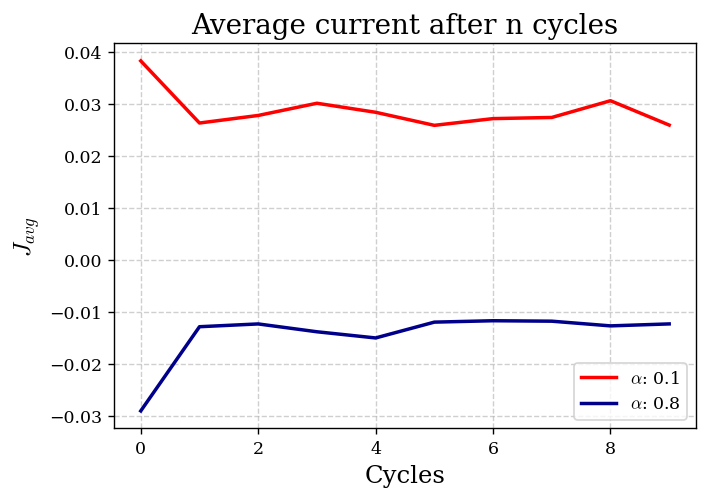

In [78]:
#oppgave 3b)
#parametere

antall_partikler = 12*N
x = np.arange(-N+1,N+1,1)
alpha = 0.8
x_l = (-(1-alpha)*N)
x_r = (alpha*N)
cycles = 10
timesteps = 500
probabilityList, probabilityList_c = probabilities(v)

init_pos = np.array([])
size = 6

for i in range(len(x)):
    for j in range(size):
        init_pos = np.append(init_pos,x[i])

positions,current = RandomWalk(cycles,timesteps,antall_partikler,init_pos)

###################################################################################################
#ny alpha verdi, dette fører også til endring av andre variabler

alpha = 0.1
x_l = (-(1-alpha)*N)
x_r = (alpha*N)
probabilityList, probabilityList_c = probabilities(v)

init_pos = np.array([])
size = 6

for i in range(len(x)):
    for j in range(size):
        init_pos = np.append(init_pos,x[i])

positions1,current1 = RandomWalk(cycles,timesteps,antall_partikler,init_pos)

###################################################################################################
#liste av data
data = pd.DataFrame([
    j_avr(cycles, current, timesteps),
    j_avr(cycles,current1,timesteps)
    
], index=[ "Average current alpha: 0.8", "Average Current alpha: 0.1"])

###################################################################################################
#plot

plt.plot(range(cycles),j_avr(cycles,current1,timesteps), color = "red", label = fr'$\alpha$: {0.1}')
plt.plot(range(cycles),j_avr(cycles,current,timesteps), color = "darkblue", label = fr'$\alpha$: {0.8}')
plt.title("Average current after n cycles")
plt.xlabel("Cycles")
plt.ylabel(r"$J_{avg}$")
plt.legend()

data

For hver syklus vil partiklene starte i $V_2$ før de slippes ned i sagtannpotensialet $V_1$. I $V_2$ er bevegelsen vilkårlig, som gir null gjennomsnittlig beveglesesstrøm. Når de slippes ned i sagtannpotensialet, som for $\alpha = 0.8$ består av 80% områder der de vil trekke mot negativ retning. Gjennomsnittlig partikkelstrøm for hver syklus vil da bli negativ og ulik null.

Første syklus har høyere gjennomsnittlig partikkelstrøm sammenlignet med senere sykluser. Dette skyldes forskjellig initialposisjoner for første syklus. Ved første syklus inisialiseres partiklene uniformt, og faller ned i sagtannpotensialet "mer spredt". De faller ned i høyere deler av sagtennene og bruker flere steg på å nå sitt lokale minimum. Ved senere sykluser initialiseres partiklene ut i fra det lokale minimumet det lå i. I oppgave 2, ser vi at partiklene vil følge en normalfordeling i konstant potensial. Normalfordelingen begrenser deres evne til å falle ned i høyere deler av sagtennene, noe som gir lavere gjennomsnittstrøm.

Når vi endrer $\alpha$ til $0.1$, endrer vi hvordan potensialet ser ut. Nå består det av 90% nedoverbakke som trekker partikler i positiv retning, i motsetning til $\alpha = 0.8$ som sender andre veien. Absoluttverdien av strømmene er forskjellige fordi potensialet består av nedoverbakker med forskjellige lengder.

### Oppgave 3c)

In [79]:
#parameters
alpha = 0.8
N = 100
x_l = (-(1-alpha)*N)
x_r = (alpha*N)
beta_k = 1000
probabilityList, probabilityList_c = probabilities(v)
antall_partikler = 40*N
cycles = 1


timestep_vals = np.arange(21,1002,20)
j_avr_list_0 = np.zeros(len(timestep_vals))

for i in range(len(timestep_vals)):
    init_pos = np.concatenate((np.zeros(int(antall_partikler/2)),np.ones(int(antall_partikler/2))*N))
    positions,current = RandomWalk(cycles,timestep_vals[i],antall_partikler,init_pos)
    j_avr_list_0[i] = j_avr(cycles,current,timestep_vals[i])




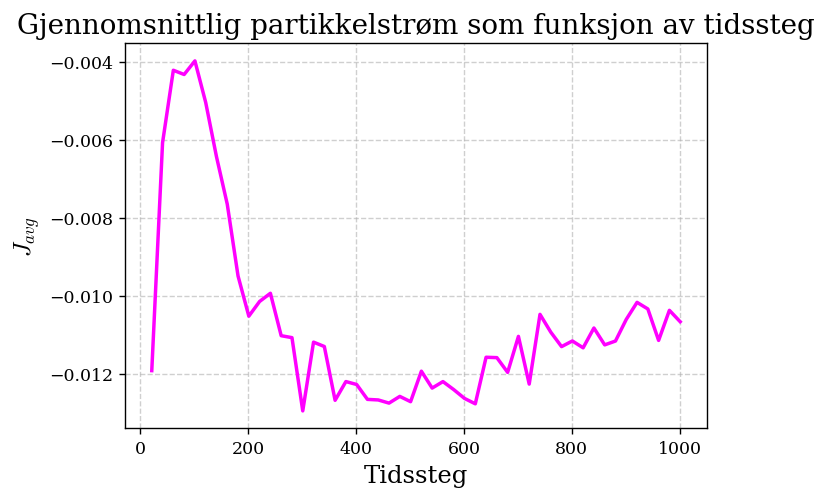

In [80]:
plt.plot(timestep_vals,j_avr_list_0, color = "magenta")
plt.title("Gjennomsnittlig partikkelstrøm som funksjon av tidssteg")
plt.xlabel("Tidssteg")
plt.ylabel(r"$J_{avg}$")
plt.show()

Når $\alpha = 0.8$ er potensialet assymterisk. Da partiklene starter i potensialets minimumspunkter må det gå minst $(1-\alpha)\cdot N$ tidssteg for at partiklene skal kunne bevege seg over det nærmeste maksimumspunktet. Sannsynligheten for at flere partikler kommer seg over det nærmeste maksimumspunktet øker med antall tidssteg. Dermed øker absoluttverdien av den gjennomsnittlige partikkelstrømmen. Når antall tidssteg blir enda større vil gjennsomsnittstrømmen konvergere mot $0$. Dette ser vi fra definisjonen

$J_{\text{avg}}(n) = \frac{1}{2T_p} \sum_{i=1+2T_p n}^{P 2T_p (n+1)} J(t_i)$,

og diskuteres videre i oppgave 4b).

### Oppgave 3d)

In [81]:
alfa_verdier = np.linspace(0,1,50)
j_avg_numerisk_alfa = np.zeros(len(alfa_verdier))
beta_k = 1000
timesteps = 500
cycles = 1
antall_partikler = 12*N

for i in range(len(alfa_verdier)):
    alpha = alfa_verdier[i]
    x_l = (-(1-alpha)*N)
    x_r = (alpha*N)
    init_pos = np.concatenate((np.zeros(int(antall_partikler/2)),np.ones(int(antall_partikler/2))*N))
    probabilityList, probabilityList_c = probabilities(v)
    
    positions,current = RandomWalk(cycles,timesteps,antall_partikler,init_pos)
    j_avg_numerisk_alfa[i] = j_avr(cycles,current,timesteps)
    

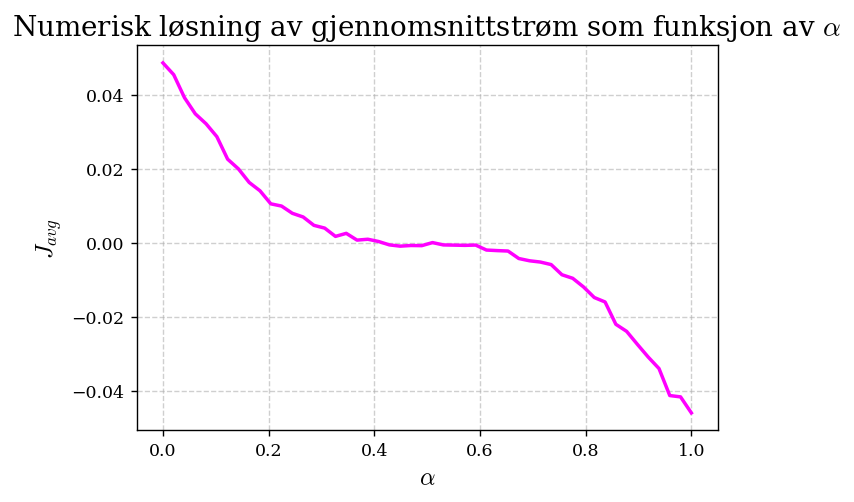

In [82]:
plt.plot(alfa_verdier, j_avg_numerisk_alfa, label = "Numerisk løsning", color = "magenta")
plt.title(r"Numerisk løsning av gjennomsnittstrøm som funksjon av $\alpha$")
plt.ylabel(r"$J_{avg}$")
plt.xlabel(r"$\alpha$")
plt.show()

Sagtannspotensialet består av segmenter med ulik lengde og helning. Hvor en større andel av potensialprofilen har en negativ eller positiv skråning som favoriserer bevegelse i én retning. Når $\alpha < 0.5$ er potensialet assymetrisk og det vil være en lengre helning mot høyre, noe som favoriserer bevegelse i positiv retning. Med $\alpha = 0.5$ vil potensialet være symmetrisk om sitt minimumspunkt, og bevegelsen vil få like stor andel helning i begge retninger. Dette gir en gjennomsnittsstrøm lik null. Hvis $\alpha > 0.5$ vil potensialet igjen være assymetrisk, men i motsatt retning av når $\alpha < 0.5$ . Dette trekker partiklene i gjennomsnitt i negativ retning og det oppstår en negativ gjennomsnittsstrøm.

### Oppgave 4a)

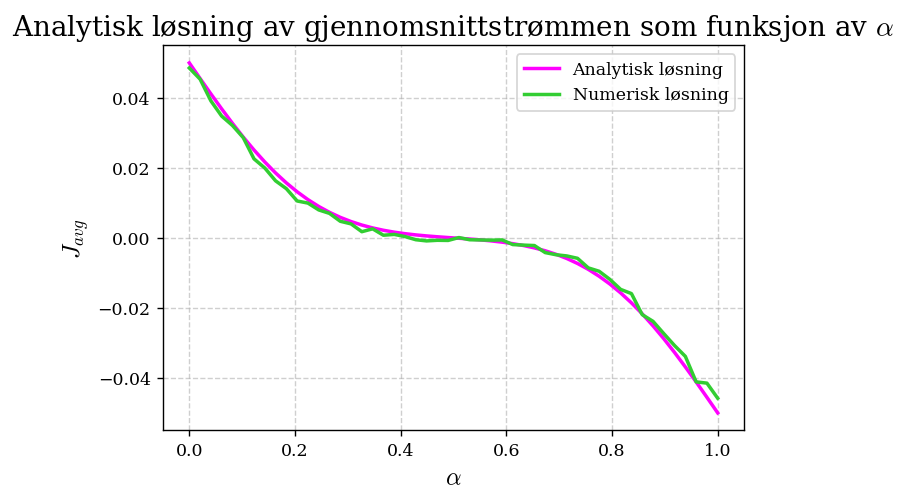

In [83]:
from scipy.special import erfc

def J_anal(Nx, Tp,alfa): 
    j_avg = (Nx/(4*Tp))*(erfc(alfa*(Nx/2)*np.sqrt(3/Tp))-erfc((1-alfa)*(Nx/2)*(np.sqrt(3/Tp))))
    return j_avg

j_avg_anal = []

for i in range(len(alfa_verdier)):
    j_avg_anal.append(J_anal(100,500,alfa_verdier[i]))
plt.plot(alfa_verdier, j_avg_anal, label = "Analytisk løsning",color = "magenta")
plt.plot(alfa_verdier, j_avg_numerisk_alfa, label = "Numerisk løsning", color = "limegreen")
plt.title(r"Analytisk løsning av gjennomsnittstrømmen som funksjon av $\alpha$")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$J_{avg}$")
plt.legend()
plt.show()

Den numeriske løsningen følger den analytiske løsningen godt. Det gir grunnlag for å tro at den numeriske løsningen er riktig. Den numeriske simuleringen er likevel kun testet for ett sett med parametre, blant annet med relativ lav temperatur. Derfor vil det også være en viss usikkerhet til den analytiske løsningen.

### Oppgave 4b)

In [84]:
timestep_vals = np.arange(80,1501,71)
j_avg_anal_tp = []
alpha = 0.8
N = 10

for i in range(len(timestep_vals)):
    j_avg_anal_tp.append(J_anal(10,timestep_vals[i],alpha))

x_l = (-(1-alpha)*N)
x_r = (alpha*N)
beta_k = 1000
probabilityList, probabilityList_c = probabilities(v)
antall_partikler = 40*N
cycles = 1


j_avr_list = np.zeros(len(timestep_vals))

for i in range(len(timestep_vals)):
    init_pos = np.concatenate((np.zeros(int(antall_partikler/2)),np.ones(int(antall_partikler/2))*N))
    positions,current = RandomWalk(cycles,timestep_vals[i],antall_partikler,init_pos)
    j_avr_list[i] = j_avr(cycles,current,timestep_vals[i])





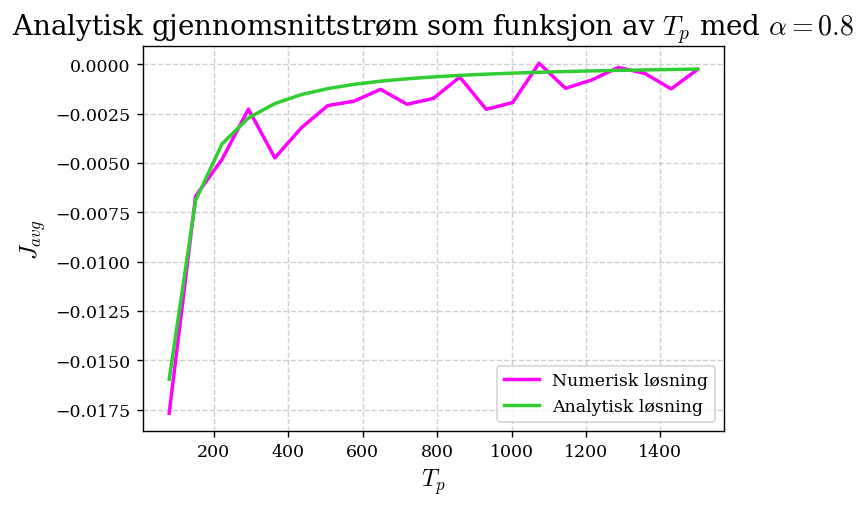

In [92]:
plt.plot(timestep_vals, j_avr_list, color = "magenta", label = "Numerisk løsning")
plt.plot(timestep_vals, j_avg_anal_tp, color = "limegreen", label = "Analytisk løsning")
plt.plot()
plt.title(r"Analytisk gjennomsnittstrøm som funksjon av $T_p$ med $\alpha = 0.8$")
plt.xlabel(r"$T_p$")
plt.ylabel(r"$J_{avg}$")
plt.legend(loc = "lower right")
plt.show()

Den numeriske grafen stemmer godt overens med den analytiske. Gjennomsnittsstrømmen er definert slik:  $J_{\text{avg}}(n) = \frac{1}{2T_p} \sum_{i=1+2T_p n}^{P 2T_p (n+1)} J(t_i)$. Maksimalt antall steg partiklene kan gå i en retning før de når et potensialminimum er $N$. Dette skjer når $\alpha = 0$ eller $\alpha = 1$. Etter $N$ steg vil partiklene holde seg i ro i minimumene. Dette gir $0$ partikkelstrøm. Slik vil man for resterende $T_p - N$ tidssteg ikke få noen partikkelstrøm. En betydelig økning i $T_p$ fører til at gjennomsnittstrømmen konvergerer mot null. Dette ser man fra uttrykket til gjennomsnittstrømmen. 

### Oppgave 4c)

In [86]:
beta_k_list = np.array([0.01,1,2,3,5,10])
N = 100
alpha_verdier = np.linspace(0,1,50)
antall_partikler = 12*N
timesteps = 500
cycles = 1
j_avg_num_alpha_list = np.zeros((len(beta_k_list),len(alpha_verdier)))

for j in range(len(beta_k_list)):
    beta_k = beta_k_list[j]

    for i in range(len(alpha_verdier)):
        alpha = alpha_verdier[i]
        x_l = (-(1-alpha)*N)
        x_r = (alpha*N)
        init_pos = np.concatenate((np.zeros(int(antall_partikler/2)),np.ones(int(antall_partikler/2))*N))
        probabilityList, probabilityList_c = probabilities(v)
        
        positions,current = RandomWalk(cycles,timesteps,antall_partikler,init_pos)
        j_avg_num_alpha_list[j][i] = j_avr(cycles,current,timesteps)

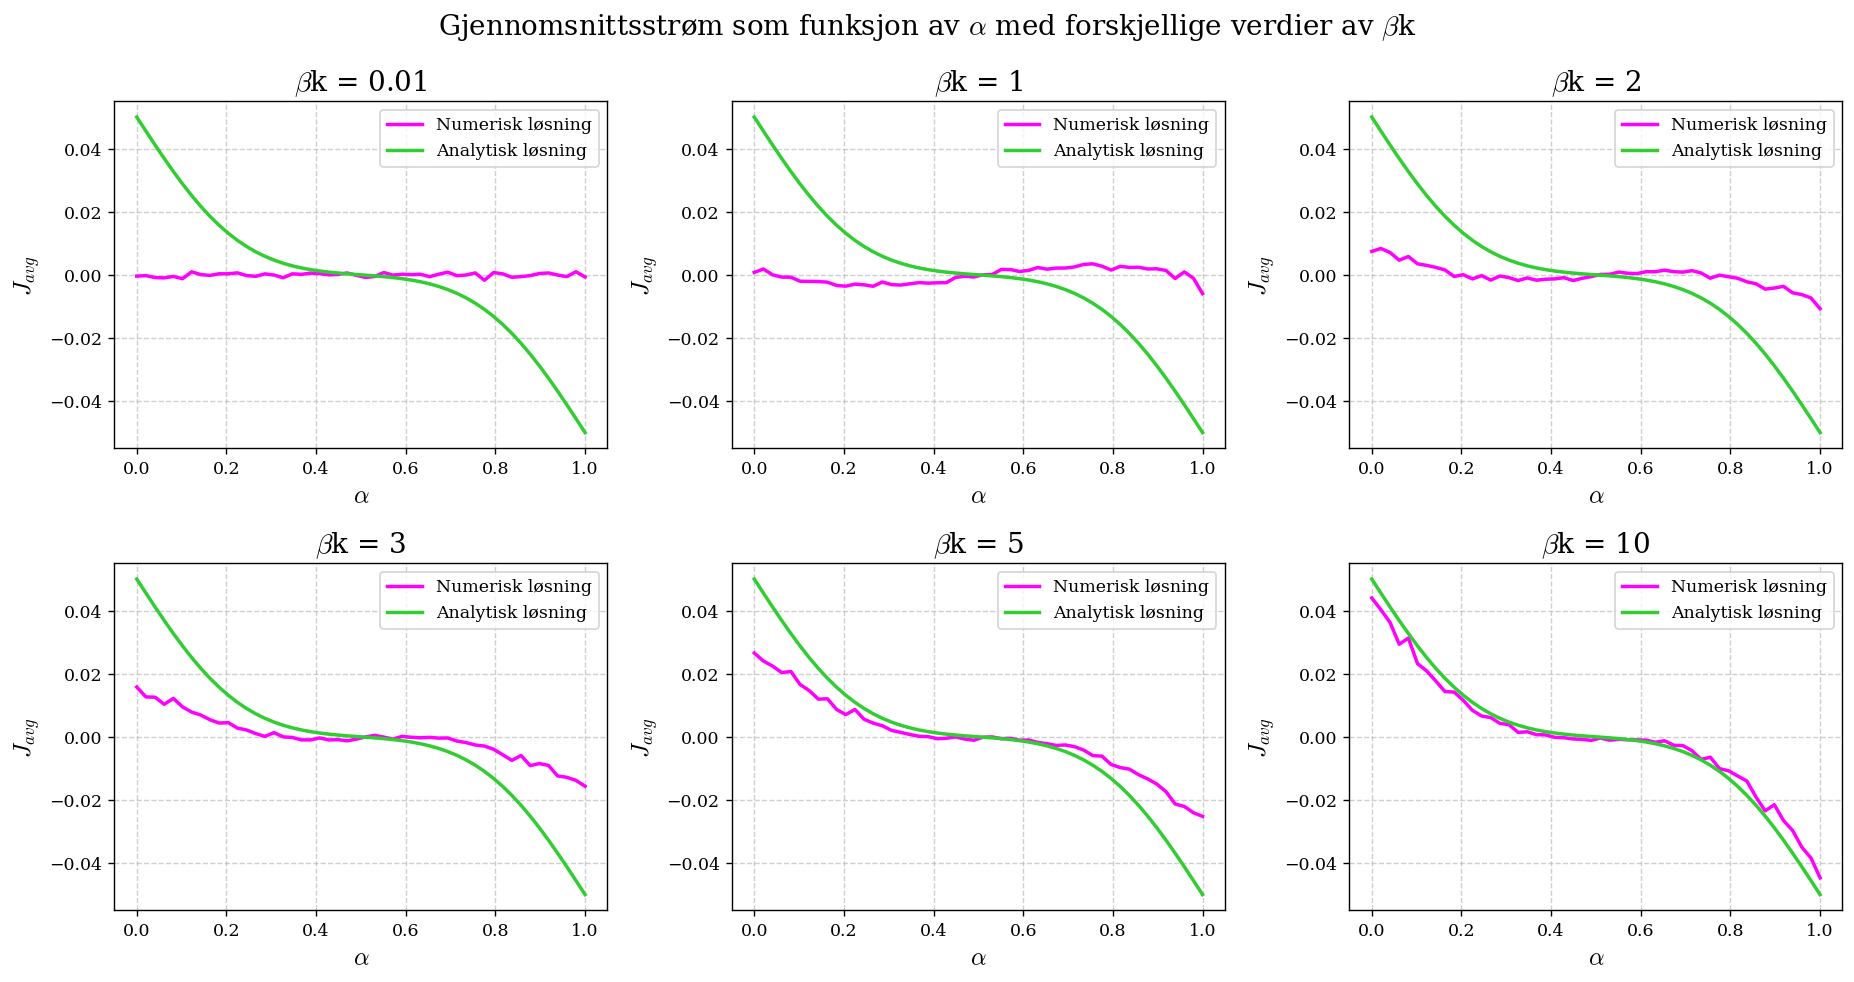

In [87]:
def plot(ax,vals,title,beta):
    x_min, x_max = ax.get_xlim()  # Hent grensene for x-aksen
    x = np.linspace(x_min, x_max, 50)  # Opprett x-verdier over hele plottet
    ax.plot(x,vals,label = "Numerisk løsning", color = "magenta")
    ax.plot(x,j_avg_anal, label = "Analytisk løsning", color = "limegreen")
    ax.set_title(title)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"$J_{avg}$")
    ax.legend(loc = "upper right")

plt.figure(figsize=(15, 8))

plt.subplot(231)
plot(plt.gca(),j_avg_num_alpha_list[0],fr"$\beta$k = 0.01",0.01)
plt.subplot(232)
plot(plt.gca(),j_avg_num_alpha_list[1],fr"$\beta$k = 1",1)
plt.subplot(233)
plot(plt.gca(),j_avg_num_alpha_list[2],fr"$\beta$k = 2",2)
plt.subplot(234)
plot(plt.gca(),j_avg_num_alpha_list[3],fr"$\beta$k = 3",3)
plt.subplot(235)
plot(plt.gca(),j_avg_num_alpha_list[4],fr"$\beta$k = 5",5)
plt.subplot(236)
plot(plt.gca(),j_avg_num_alpha_list[5],fr"$\beta$k = 10",10)

plt.suptitle(r"Gjennomsnittsstrøm som funksjon av $\alpha$ med forskjellige verdier av $\beta$k", fontsize=16)
plt.tight_layout()
plt.show()


### Oppgave 4d)

Den analytiske løsningen antar at systemet har lav termisk energi og modelleres uavhengig av temperaturen. Løsningen er altså begrenset til systemer med lav termisk energi. Dette kan vi se på plottet med $\beta k = 0.01$. Her er temperaturen høy og den numeriske simuleringen vil gi en gjennomsnittstrøm som er uavhengig av potensialet. Dette er forklart i oppgave 1c). Den analytiske løsningen er derimot god når temperaturen blir lavere. Som nevnt tidligere i oppgave 1c) vil da virrevandringen i stor grad bli styrt av potensialforskjeller der den beveger seg mot lavere potensial. 